# CNN 실습 세션 과제
---
- 출제자 : 김서진 이성균
- 기한 : 2023/08/26 23:59
- 기수/이름 : 10기 / 윤희찬


## Part1. Tutorial for Pytorch and CNN
- 개인 공부를 위한 부분으로 별도로 빈칸을 채우는 부분은 없습니다.
- 각자 코드를 실행시켜보며 CNN과 pytorch 기초를 공부해보세요!
- 출처 : 8기 학술부 CNN 세션 과제

#### 파이토치(PyTorch) 기초문법

* 페이스북이 초기 루아(Lua) 언어로 개발된 토치(Torch)를 파이썬 버전으로 개발하여 2017년도에 공개
* 초기에 토치(Torch)는 넘파이(NumPy) 라이브러리처럼 과학 연산을 위한 라이브러리로 공개
* 이후 GPU를 이용한 텐서 조작 및 동적 신경망 구축이 가능하도록 딥러닝 프레임워크로 발전시킴
* 파이썬답게 만들어졌고, 유연하면서도 가속화된 계산 속도를 제공

#### 파이토치 모듈 구조

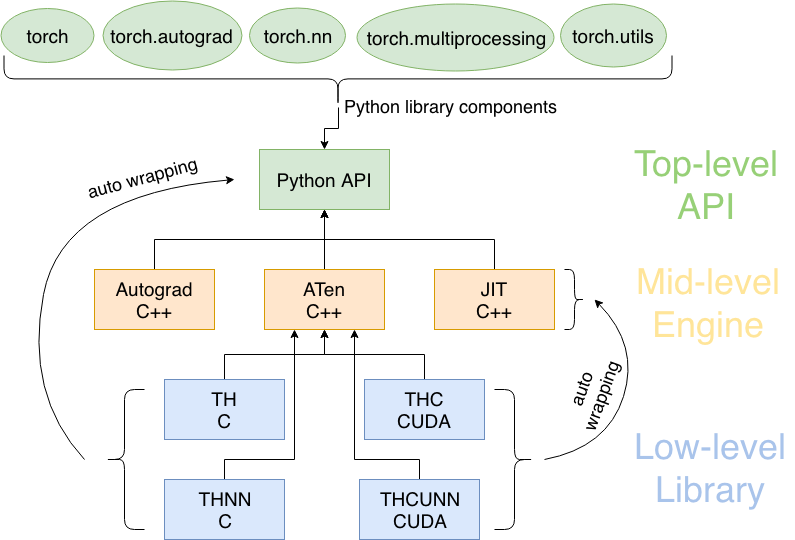

<small>출처: Deep Learning with PyTorch by Eli Stevens Luca Antiga. MEAP Publication. https://livebook.manning.com/#!/book/deep-learning-with-pytorch/welcome/v-7/</small>

#### 파이토치의 구성요소

- `torch`: 메인 네임스페이스, 텐서 등의 다양한 수학 함수가 포함
- `torch.autograd`: 자동 미분 기능을 제공하는 라이브러리
- `torch.nn`: 신경망 구축을 위한 데이터 구조나 레이어 등의 라이브러리
- `torch.multiprocessing`: 병럴처리 기능을 제공하는 라이브러리
- `torch.optim`: SGD(Stochastic Gradient Descent)를 중심으로 한 파라미터 최적화 알고리즘 제공
- `torch.utils`: 데이터 조작 등 유틸리티 기능 제공
- `torch.onnx`: ONNX(Open Neural Network Exchange), 서로 다른 프레임워크 간의 모델을 공유할 때 사용

In [1]:
import torch

torch.__version__

'2.1.0.dev20230808+cu121'

#### 텐서(Tensors)

* 데이터 표현을 위한 기본 구조로 텐서(tensor)를 사용
* 텐서는 데이터를 담기위한 컨테이너(container)로서 일반적으로 수치형 데이터를 저장
* 넘파이(NumPy)의 ndarray와 유사
* GPU를 사용한 연산 가속 가능

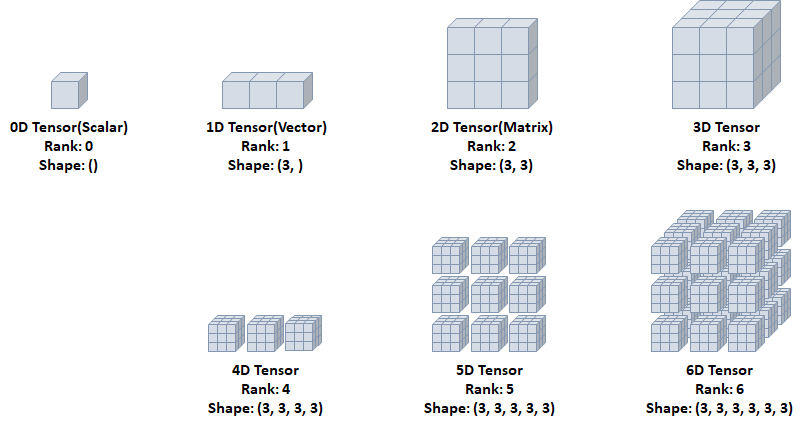

##### 텐서 초기화와 데이터 타입

초기화 되지 않은 텐서

In [3]:
# empty()
# 4x2 matrix tensor

x = torch.empty(4,2)
x # random값이 들어있다.

tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])

무작위로 초기화된 텐서

In [4]:
# randn()
# 4x2 matrix tensor

x = torch.randn(4,2)
x

tensor([[-2.0659, -0.1489],
        [-0.5750, -1.2809],
        [-0.3997,  1.5754],
        [-1.6415, -0.2812]])

데이터 타입(dtype)이 long이고, 0으로 채워진 텐서

In [5]:
# zeros() & dtype
# long = 정수형

x = torch.zeros(4,2, dtype=torch.long)
x

tensor([[0, 0],
        [0, 0],
        [0, 0],
        [0, 0]])

사용자가 입력한 값으로 텐서 초기화

In [6]:
# tensor()

x = torch.tensor([3, 2.3])
x

tensor([3.0000, 2.3000])

2 x 4 크기, double 타입, 1로 채워진 텐서

In [7]:
# new_ones()

x = x.new_ones(2,4, dtype=torch.double)
x

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]], dtype=torch.float64)

x와 같은 크기, float 타입, 무작위로 채워진 텐서

In [8]:
# randn_like()

x = torch.randn_like(x, dtype=torch.float)
x

tensor([[ 0.0403, -0.0025,  0.1473,  0.6058],
        [-0.5561,  0.7625,  0.4320,  1.2763]])

텐서의 크기 계산

In [9]:
# .size()

x.size()

torch.Size([2, 4])

##### 데이터 타입(Data Type)

| Data type | dtype | CPU tensor | GPU tensor |
| ------ | ------ | ------ | ------ |
| 32-bit floating point | `torch.float32` or `torch.float` |`torch.FloatTensor` | `torch.cuda.FloatTensor` |
| 64-bit floating point | `torch.float64` or `torch.double` |`torch.DoubleTensor` | `torch.cuda.DoubleTensor` |
| 16-bit floating point | `torch.float16` or `torch.half` |`torch.HalfTensor` | `torch.cuda.HalfTensor` |
| 8-bit integer(unsinged) | `torch.uint8` |`torch.ByteTensor` | `torch.cuda.ByteTensor` |
| 8-bit integer(singed) | `torch.int8` |`torch.CharTensor` | `torch.cuda.CharTensor` |
| 16-bit integer(signed) | `torch.int16` or `torch.short` |`torch.ShortTensor` | `torch.cuda.ShortTensor` |
| 32-bit integer(signed) | `torch.int32` or `torch.int` |`torch.IntTensor` | `torch.cuda.IntTensor` |
| 64-bit integer(signed) | `torch.int64` or `torch.long` |`torch.LongTensor` | `torch.cuda.LongTensor` |

In [10]:
# FloatTensor()

ft = torch.FloatTensor([1,2,3])
print(ft)
print(ft.dtype) # default = float32

tensor([1., 2., 3.])
torch.float32


In [11]:
# int

print(ft.short()) # 짧은 메모리의 정수; 16bits
print(ft.int()) # 중간 메모리의 정수; 32bits
print(ft.long()) # 긴 메모리의 정수; 64bits

tensor([1, 2, 3], dtype=torch.int16)
tensor([1, 2, 3], dtype=torch.int32)
tensor([1, 2, 3])


In [12]:
# IntTensor()

it = torch.IntTensor([1,2,3])
print(it)
print(it.dtype)

tensor([1, 2, 3], dtype=torch.int32)
torch.int32


In [13]:
# float

print(it.float()) # 32bits
print(it.double()) # 64bits
print(it.half()) # 16bits

tensor([1., 2., 3.])
tensor([1., 2., 3.], dtype=torch.float64)
tensor([1., 2., 3.], dtype=torch.float16)


##### CUDA Tensors

- `.to` 메소드를 사용하여 텐서를 어떠한 장치(cpu, gpu)로도 옮길 수 있음

In [14]:
x  = torch.randn(1)
print(x) # tensor로 관찰
print(x.item()) # 실제 값; 더 길게 확인됨
print(x.dtype) # 자료형; 실수

tensor([-1.9004])
-1.9004250764846802
torch.float32


In [15]:
# torch.cuda.is_available() -> True이면, 'cuda'로 device가 계산됨
# torch.cuda.is_available() -> False이면, 'cpu'로 device가 계산됨

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

# 아래 두개를 조건문으로 나눈 것

device(type='cuda')

In [16]:
torch.device('cuda')

device(type='cuda')

In [17]:
torch.device('cpu')

device(type='cpu')

In [18]:
# x라는 스칼라 tensor와 크기가 같은 1값만 있는 tensor를, cuda를 이용하도록 선언

y = torch.ones_like(x, device=device)
y

tensor([1.], device='cuda:0')

In [19]:
# 기존에 그냥 cpu로 정의된 tensor를 cuda로 바꿔서 선언

x = x.to(device)
x

tensor([-1.9004], device='cuda:0')

In [20]:
z = x + y
print(z) # cuda로 정의된 tensor끼리 합
print(z.to('cpu', torch.double)) # cpu로 다시 재정의

tensor([-0.9004], device='cuda:0')
tensor([-0.9004], dtype=torch.float64)


##### 다차원 텐서 표현

0D Tensor(Scalar)

* 하나의 숫자를 담고 있는 텐서(tensor)
* 축과 형상이 없음

In [21]:
t0 = torch.tensor(0)
print(t0.ndim) # dim = 0; scaler
print(t0.shape) # size = []; scaler
print(t0) # 값도 tensor 0

0
torch.Size([])
tensor(0)


1D Tensor(Vector)

* 값들을 저장한 리스트와 유사한 텐서
* 하나의 축이 존재

In [22]:
t1 = torch.tensor([1,2,3])
print(t1.ndim)
print(t1.shape)
print(t1)

1
torch.Size([3])
tensor([1, 2, 3])


2D Tensor(Matrix)

* 행렬과 같은 모양으로 두개의 축이 존재
* 일반적인 수치, 통계 데이터셋이 해당
* 주로 샘플(samples)과 특성(features)을 가진 구조로 사용

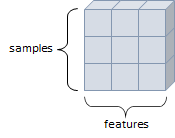

In [23]:
t2 = torch.tensor([[1,2,3],
                   [4,5,6],
                   [7,8,9]])
print(t2.ndim)
print(t2.shape)
print(t2)

2
torch.Size([3, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


3D Tensor

* 큐브(cube)와 같은 모양으로 세개의 축이 존재
* 데이터가 연속된 시퀀스 데이터나 시간 축이 포함된 시계열 데이터에 해당
* 주식 가격 데이터셋, 시간에 따른 질병 발병 데이터 등이 존재
* 주로 샘플(samples), 타임스텝(timesteps), 특성(features)을 가진 구조로 사용 

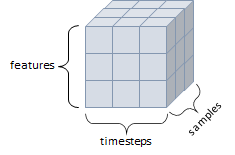

In [24]:
t3 = torch.tensor([
                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]],

                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]],

                   [[1,2,3],
                   [4,5,6],
                   [7,8,9]]
                   ])
print(t3.ndim)
print(t3.shape)
print(t3)

3
torch.Size([3, 3, 3])
tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]],

        [[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])


4D Tensor

* 4개의 축
* 컬러 이미지 데이터가 대표적인 사례 (흑백 이미지 데이터는 3D Tensor로 가능)
* 주로 샘플(samples), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

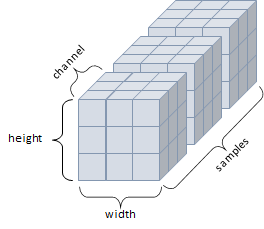

5D Tensor

* 5개의 축
* 비디오 데이터가 대표적인 사례
* 주로 샘플(samples), 프레임(frames), 높이(height), 너비(width), 컬러 채널(channel)을 가진 구조로 사용

##### 텐서의 연산(Operations)

* 텐서에 대한 수학 연산, 삼각함수, 비트 연산, 비교 연산, 집계 등 제공

In [25]:
import math

a = torch.randn(1,2) * 2 - 1
a

tensor([[-2.0951, -1.0148]])

In [26]:
print(torch.abs(a))
print(torch.ceil(a)) # 올림
print(torch.floor(a)) # 내림
print(torch.clamp(a, -0.5, 0.5)) # 최대값과 최솟값이 이 범위를 넘으면, 이 범위값으로 만든다.

tensor([[2.0951, 1.0148]])
tensor([[-2., -1.]])
tensor([[-3., -2.]])
tensor([[-0.5000, -0.5000]])


In [27]:
print(torch.min(a))
print(torch.max(a))
print(torch.mean(a))
print(torch.std(a))
print(torch.prod(a))
print(torch.unique(torch.tensor([1,2,3,1,2,3])))

tensor(-2.0951)
tensor(-1.0148)
tensor(-1.5550)
tensor(0.7639)
tensor(2.1261)
tensor([1, 2, 3])


`max`와 `min`은 `dim` 인자를 줄 경우 argmax와 argmin도 함께 리턴
- argmax: 최대값을 가진 인덱스
- argmin: 최소값을 가진 인덱스



In [28]:
x = torch.randn(2,2)
print(x, '\n')

print(x.max(dim=0)) # 같은 열기준, 행끼리 비교
print(x.max(dim=1)) # 같은 행기준, 열끼리 비교

tensor([[ 0.4019, -0.2394],
        [ 0.0486,  1.6309]]) 

torch.return_types.max(
values=tensor([0.4019, 1.6309]),
indices=tensor([0, 1]))
torch.return_types.max(
values=tensor([0.4019, 1.6309]),
indices=tensor([0, 1]))


In [29]:
x = torch.randn(2,2)
print(x, '\n')

print(x.min(dim=0)) # 같은 열기준, 행끼리 비교
print(x.min(dim=1)) # 같은 행기준, 열끼리 비교

tensor([[-0.5821,  0.7573],
        [ 1.3176,  0.5156]]) 

torch.return_types.min(
values=tensor([-0.5821,  0.5156]),
indices=tensor([0, 1]))
torch.return_types.min(
values=tensor([-0.5821,  0.5156]),
indices=tensor([0, 1]))


In [30]:
x = torch.randn(2,2)
print(x)
y = torch.randn(2,2)
print(y)

tensor([[ 0.5502, -1.0747],
        [ 0.1066, -0.1217]])
tensor([[ 0.0158,  0.9448],
        [-0.9653, -0.4864]])


`torch.add`: 덧셈

In [31]:
# add(); 동일한 두 방법
print(x + y)
print(torch.add(x,y))

tensor([[ 0.5659, -0.1299],
        [-0.8587, -0.6081]])
tensor([[ 0.5659, -0.1299],
        [-0.8587, -0.6081]])


결과 텐서를 인자로 제공

In [32]:
result = torch.empty(2,4)
torch.add(x,y, out=result) # x+y를 result에 저장한다.
result

C:\Users\user\AppData\Local\Temp\ipykernel_13440\1748474070.py:2: UserWarning: An output with one or more elements was resized since it had shape [2, 4], which does not match the required output shape [2, 2]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:35.)
  torch.add(x,y, out=result) # x+y를 result에 저장한다.


tensor([[ 0.5659, -0.1299],
        [-0.8587, -0.6081]])

`in-place` 방식
  - in-place방식으로 텐서의 값을 변경하는 연산 뒤에는 _''가 붙음
  - `x.copy_(y), x.t_()`

In [33]:
print(x)
print(y, '\n')

y.add_(x) # y = y + x; replace
print(y)

tensor([[ 0.5502, -1.0747],
        [ 0.1066, -0.1217]])
tensor([[ 0.0158,  0.9448],
        [-0.9653, -0.4864]]) 

tensor([[ 0.5659, -0.1299],
        [-0.8587, -0.6081]])


`torch.sub`: 뺄셈

In [34]:
print(x)
print(y, '\n')

print(x - y)
print(torch.sub(x, y))
print(x.sub(y))

tensor([[ 0.5502, -1.0747],
        [ 0.1066, -0.1217]])
tensor([[ 0.5659, -0.1299],
        [-0.8587, -0.6081]]) 

tensor([[-0.0158, -0.9448],
        [ 0.9653,  0.4864]])
tensor([[-0.0158, -0.9448],
        [ 0.9653,  0.4864]])
tensor([[-0.0158, -0.9448],
        [ 0.9653,  0.4864]])


`torch.mul`: 곱셉 <- 각 행렬이 같은 사이즈이면, 각은 원소끼리 곱한다.

In [35]:
print(x)
print(y, '\n')

print(x * y)
print(torch.mul(x, y))
print(x.mul(y))

tensor([[ 0.5502, -1.0747],
        [ 0.1066, -0.1217]])
tensor([[ 0.5659, -0.1299],
        [-0.8587, -0.6081]]) 

tensor([[ 0.3114,  0.1396],
        [-0.0915,  0.0740]])
tensor([[ 0.3114,  0.1396],
        [-0.0915,  0.0740]])
tensor([[ 0.3114,  0.1396],
        [-0.0915,  0.0740]])


`torch.div`: 나눗셈

In [36]:
print(x)
print(y, '\n')

print(x / y)
print(torch.div(x, y))
print(x.div(y))

tensor([[ 0.5502, -1.0747],
        [ 0.1066, -0.1217]])
tensor([[ 0.5659, -0.1299],
        [-0.8587, -0.6081]]) 

tensor([[ 0.9721,  8.2740],
        [-0.1241,  0.2001]])
tensor([[ 0.9721,  8.2740],
        [-0.1241,  0.2001]])
tensor([[ 0.9721,  8.2740],
        [-0.1241,  0.2001]])


`torch.mm`: 내적(dot product) <- 우리가 흔히 아는 행렬 곱

In [37]:
print(x)
print(y, '\n')

# 내적
print(torch.matmul(x, y))
z = torch.mm(x, y)
print(z, '\n')

# svd
print(torch.svd(z))

tensor([[ 0.5502, -1.0747],
        [ 0.1066, -0.1217]])
tensor([[ 0.5659, -0.1299],
        [-0.8587, -0.6081]]) 

tensor([[1.2342, 0.5820],
        [0.1648, 0.0601]])
tensor([[1.2342, 0.5820],
        [0.1648, 0.0601]]) 

torch.return_types.svd(
U=tensor([[-0.9919, -0.1270],
        [-0.1270,  0.9919]]),
S=tensor([1.3757, 0.0158]),
V=tensor([[-0.9051,  0.4252],
        [-0.4252, -0.9051]]))


##### 텐서의 조작(Manipulations)

인덱싱(Indexing): NumPy처럼 인덱싱 형태로 사용가능

In [38]:
x = torch.Tensor([[1,2],
                  [3,4]])

print(x)

# indexing; (행,열)
print(x[0,0])
print(x[0,1])
print(x[1,0])
print(x[1,1], '\n')

# slicing
print(x[:, 0])
print(x[:, 1], '\n')

print(x[0, :])
print(x[1, :], '\n')

tensor([[1., 2.],
        [3., 4.]])
tensor(1.)
tensor(2.)
tensor(3.)
tensor(4.) 

tensor([1., 3.])
tensor([2., 4.]) 

tensor([1., 2.])
tensor([3., 4.]) 



`view`: 텐서의 크기(size)나 모양(shape)을 변경

- 기본적으로 변경 전과 후에 텐서 안의 원소 개수가 유지되어야 함
- -1로 설정되면 계산을 통해 해당 크기값을 유추

In [39]:
x = torch.randn(4,5)
print(x, '\n')

y = x.view(20) # (20,)
print(y, '\n')

z = x.view(5,-1) # (5,4)
print(z, '\n')

tensor([[-0.0987,  0.5745, -0.5913, -0.4566,  0.9397],
        [-1.7375,  0.3060,  0.3509,  0.7466, -0.8254],
        [ 3.2044, -1.6327,  1.9597, -1.0657, -0.2171],
        [-0.4195, -0.8594,  0.1723,  0.9790,  0.4454]]) 

tensor([-0.0987,  0.5745, -0.5913, -0.4566,  0.9397, -1.7375,  0.3060,  0.3509,
         0.7466, -0.8254,  3.2044, -1.6327,  1.9597, -1.0657, -0.2171, -0.4195,
        -0.8594,  0.1723,  0.9790,  0.4454]) 

tensor([[-0.0987,  0.5745, -0.5913, -0.4566],
        [ 0.9397, -1.7375,  0.3060,  0.3509],
        [ 0.7466, -0.8254,  3.2044, -1.6327],
        [ 1.9597, -1.0657, -0.2171, -0.4195],
        [-0.8594,  0.1723,  0.9790,  0.4454]]) 



`item`: 텐서에 값이 단 하나라도 존재하면 숫자값을 얻을 수 있음


In [40]:
x = torch.randn(1)
print(x, '\n')

print(x.item()) # tensor안의 value를 가져옴!
print(x.dtype)

tensor([-0.3952]) 

-0.3952254056930542
torch.float32


스칼라값 하나만 존재해야 `item()` 사용 가능

In [41]:
# x = torch.randn(2) # scaler가 아니면 안됨
# print(x, '\n')

# print(x.item()) # tensor안의 value를 가져옴!
# print(x.dtype)

`squeeze`: 차원을 축소(제거)

In [42]:
tensor = torch.randn(1,3,3) # (1,3,3) size의 tensor로 만들어준다.
print(tensor)
print(tensor.shape)

tensor([[[-0.6503,  0.6769,  0.5376],
         [ 0.5654,  1.4077, -0.9020],
         [ 0.7884,  0.5312,  0.0116]]])
torch.Size([1, 3, 3])


In [43]:
t = tensor.squeeze() # (1,3,3) -> (3,3) 으로 앞의 차원을 하나 없앤다.
print(t)
print(t.shape)

tensor([[-0.6503,  0.6769,  0.5376],
        [ 0.5654,  1.4077, -0.9020],
        [ 0.7884,  0.5312,  0.0116]])
torch.Size([3, 3])


`unsqueeze`: 차원을 증가(생성)

In [44]:
t = torch.randn(3,3) # (3,3)
print(t)
print(t.shape)

tensor([[-0.8626, -0.3228, -1.8930],
        [-1.3842, -0.1072,  0.5312],
        [-1.3191, -1.4506, -0.6725]])
torch.Size([3, 3])


In [45]:
tensor = t.unsqueeze(dim=0) # (3,3)인 t의 첫번째 차원(dim=0)을 늘려라
print(tensor)
print(tensor.shape) # (1,3,3)

tensor([[[-0.8626, -0.3228, -1.8930],
         [-1.3842, -0.1072,  0.5312],
         [-1.3191, -1.4506, -0.6725]]])
torch.Size([1, 3, 3])


In [46]:
tensor = t.unsqueeze(dim=1) # (3,3)인 t의 두번째 차원(dim=1)을 늘려라
print(tensor)
print(tensor.shape) # (3,1,3)

tensor([[[-0.8626, -0.3228, -1.8930]],

        [[-1.3842, -0.1072,  0.5312]],

        [[-1.3191, -1.4506, -0.6725]]])
torch.Size([3, 1, 3])


`stack`: 텐서간 결합

In [47]:
x = torch.FloatTensor([1,4])
print(x)
y = torch.FloatTensor([2,5])
print(y)
z = torch.FloatTensor([3,6])
print(z, '\n')

print(torch.stack([x,y,z])) # 위 아래로 합쳐준다.

tensor([1., 4.])
tensor([2., 5.])
tensor([3., 6.]) 

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


`cat`: 텐서를 결합하는 메소드(concatenate)

- 넘파이의 `stack`과 유사하지만, 쌓을 `dim`이 존재해야함
- 해당 차원을 늘려준 후 결합


In [48]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=0) # 1번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (2,3,3)

tensor([[[-0.5741, -1.7171,  0.6716],
         [ 0.0720,  0.9132,  0.8469],
         [ 0.6913,  0.7195, -0.4122]]])
tensor([[[ 0.5094,  0.4932, -0.3661],
         [ 0.2770, -0.0964, -0.2435],
         [-2.3449, -0.5560, -1.6465]]]) 

tensor([[[-0.5741, -1.7171,  0.6716],
         [ 0.0720,  0.9132,  0.8469],
         [ 0.6913,  0.7195, -0.4122]],

        [[ 0.5094,  0.4932, -0.3661],
         [ 0.2770, -0.0964, -0.2435],
         [-2.3449, -0.5560, -1.6465]]])
torch.Size([2, 3, 3])


In [49]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=1) # 2번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (1,6,3)

tensor([[[ 0.1428, -1.0015, -0.0445],
         [ 2.0569,  0.9257, -1.5096],
         [ 0.1659, -0.6295, -1.7383]]])
tensor([[[ 1.3619,  0.4155,  0.6995],
         [ 1.6126,  0.7845,  0.7723],
         [-1.5323, -1.7748, -0.7453]]]) 

tensor([[[ 0.1428, -1.0015, -0.0445],
         [ 2.0569,  0.9257, -1.5096],
         [ 0.1659, -0.6295, -1.7383],
         [ 1.3619,  0.4155,  0.6995],
         [ 1.6126,  0.7845,  0.7723],
         [-1.5323, -1.7748, -0.7453]]])
torch.Size([1, 6, 3])


In [50]:
a = torch.randn(1,3,3)
print(a)
b= torch.randn(1,3,3)
print(b, '\n')
c = torch.cat((a,b), dim=2) # 3번째 차원을 기준으로 합친다.
print(c)
print(c.shape) # (1,3,6)

tensor([[[ 0.5406,  0.1245,  0.6776],
         [ 2.8284,  1.0475,  0.4002],
         [-0.0957, -1.4107, -0.2807]]])
tensor([[[-0.2266, -1.7311, -0.2393],
         [ 0.3150, -0.4879, -1.1004],
         [-0.9459,  2.0292, -1.0259]]]) 

tensor([[[ 0.5406,  0.1245,  0.6776, -0.2266, -1.7311, -0.2393],
         [ 2.8284,  1.0475,  0.4002,  0.3150, -0.4879, -1.1004],
         [-0.0957, -1.4107, -0.2807, -0.9459,  2.0292, -1.0259]]])
torch.Size([1, 3, 6])


`chunk`: 텐서를 여러 개로 나눌 때 사용 (몇 개로 나눌 것인가?)

In [51]:
c = torch.cat((a,b), dim=1)
tensor = torch.rand(3,6)
print(tensor, '\n')

t1,t2,t3 = torch.chunk(tensor, 3, dim=1) # 2번째 차원을 3개로 나눈다.
print(t1)
print(t1.shape) # (3,2)
print(t2)
print(t2.shape) # (3,2)
print(t3)
print(t3.shape) # (3,2)

tensor([[0.8610, 0.8062, 0.7835, 0.2394, 0.1715, 0.7755],
        [0.8824, 0.9833, 0.5586, 0.2846, 0.8897, 0.0462],
        [0.8630, 0.7874, 0.2041, 0.3988, 0.8301, 0.5105]]) 

tensor([[0.8610, 0.8062],
        [0.8824, 0.9833],
        [0.8630, 0.7874]])
torch.Size([3, 2])
tensor([[0.7835, 0.2394],
        [0.5586, 0.2846],
        [0.2041, 0.3988]])
torch.Size([3, 2])
tensor([[0.1715, 0.7755],
        [0.8897, 0.0462],
        [0.8301, 0.5105]])
torch.Size([3, 2])


`split`: `chunk`와 동일한 기능이지만 조금 다름 (텐서의 크기는 몇인가?)

In [52]:
tensor = torch.randn(3,6)
t1,t2 = torch.split(tensor, 3, dim=1) # 2번째 차원을 3이라는 길이의 벡터로 나눈다.

print(tensor, '\n')
print(t1)
print(t1.shape) # (3,3)
print(t2)
print(t2.shape) # (3,3)

tensor([[-0.3396, -0.5815,  0.1481, -0.7453, -0.4230, -0.3229],
        [ 0.0240,  0.5553, -0.2901,  0.4309,  1.5145,  0.2275],
        [ 0.2310, -0.3014,  1.3061, -2.0868,  0.0893, -0.1978]]) 

tensor([[-0.3396, -0.5815,  0.1481],
        [ 0.0240,  0.5553, -0.2901],
        [ 0.2310, -0.3014,  1.3061]])
torch.Size([3, 3])
tensor([[-0.7453, -0.4230, -0.3229],
        [ 0.4309,  1.5145,  0.2275],
        [-2.0868,  0.0893, -0.1978]])
torch.Size([3, 3])


torch ↔ numpy
- Torch Tensor(텐서)를 NumPy array(배열)로 변환 가능
  - `numpy()`
  - `from_numpy()`
- Tensor가 CPU상에 있다면 NumPy 배열은 메모리 공간을 공유하므로 하나가 변하면, 다른 하나도 변함

In [53]:
a = torch.ones(7)
print(a)

tensor([1., 1., 1., 1., 1., 1., 1.])


In [54]:
# numpy() : tensor -> numpy

b = a.numpy() # numpy로 바꿔준다; 단, b라는 numpy가 a라는 tensor의 메모리를 공유한다.
# 단, cpu로 tensor가 정의될 때만 그렇다.
print(b)

[1. 1. 1. 1. 1. 1. 1.]


In [55]:
a.add_(1) # a에 1을 더한다.
print(a) # tensor에 1이 더해진다.
print(b) # numpy도 같은 메모리를 공유하기 때문에, 1이 더해진다.

tensor([2., 2., 2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2. 2. 2.]


In [56]:
# from_numpy() : numpy -> tensor

import numpy as np

a = np.ones(7)
b = torch.from_numpy(a)
np.add(a, 1, out=a)

print(a)
print(b) # numpy에 1을 더했더니, tensor도 1이 더해졌다.

[2. 2. 2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2., 2., 2.], dtype=torch.float64)


#### Autograd(자동미분)

- `torch.autograd` 패키지는 Tensor의 모든 연산에 대해 **자동 미분** 제공
- 이는 코드를 어떻게 작성하여 실행하느냐에 따라 역전파가 정의된다는 뜻
- `backprop`를 위해 미분값을 자동으로 계산

`requires_grad` 속성을 `True`로 설정하면, 해당 텐서에서 이루어지는 모든 연산들을 추적하기 시작

기록을 추적하는 것을 중단하게 하려면, `.detach()`를 호출하여 연산기록으로부터 분리

In [57]:
# 실수형이어야 뒤에서 연산이 가능하다.

a = torch.arange(1,13, dtype=torch.float).view(3,-1)
a = a + 1

print(a)
print(a.requires_grad) # 기본적으로 False로 정의됨

tensor([[ 2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9.],
        [10., 11., 12., 13.]])
False


`requires_grad_(...)`는 기존 텐서의 `requires_grad` 값을 바꿔치기(`in-place`)하여 변경

`grad_fn`: 미분값을 계산한 함수에 대한 정보 저장 (어떤 함수에 대해서 backprop 했는지)

In [58]:
a * a # 각 행렬의 같은 원소끼리 곱한다. vs 행렬곱

tensor([[  4.,   9.,  16.,  25.],
        [ 36.,  49.,  64.,  81.],
        [100., 121., 144., 169.]])

In [59]:
a.requires_grad_(True)
print(a.requires_grad)

b = (a * a)
print(b) # grad_fn=<SumBackward0> 이 기록으로 남는다.
print(b.grad_fn) # grad_fn만 확인 가능
# 마지막으로 mul을 했다.

b = (a * a).sum()
print(b) # grad_fn=<SumBackward0> 이 기록으로 남는다.
print(b.grad_fn) # grad_fn만 확인 가능
# 마지막으로 sum을 했다.

True
tensor([[  4.,   9.,  16.,  25.],
        [ 36.,  49.,  64.,  81.],
        [100., 121., 144., 169.]], grad_fn=<MulBackward0>)
tensor(818., grad_fn=<SumBackward0>)


##### 기울기(Gradient)

In [66]:
x = torch.ones(3,3, requires_grad=True)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)


In [67]:
y = x + 5
print(y)

tensor([[6., 6., 6.],
        [6., 6., 6.],
        [6., 6., 6.]], grad_fn=<AddBackward0>)


In [68]:
z = y * y # 행렬의 같은 위치의 원소끼리 곱한다.
out = z.mean() # 평균
print(z, out)

# z : 곱인 'grad_fn=<MulBackward0>'
# out : 평균인 'grad_fn=<MeanBackward0>'

tensor([[36., 36., 36.],
        [36., 36., 36.],
        [36., 36., 36.]], grad_fn=<MulBackward0>) tensor(36., grad_fn=<MeanBackward0>)


In [69]:
print(y.requires_grad) # 'requires_grad=True'인 x로 만든 y 또한 True이다.
print(z.requires_grad)
print(out.requires_grad)

True
True
True


참고자료 : https://deepinsight.tistory.com/84

다음 섹션에서 자세히 다룬다.

In [70]:
# 'requires_grad=True'를 해도, grad에 대한 backward 계산을 하지 않았기에
# .grad 안에는 None값이 들어가있다.
# 물론, .grad_fn 안에는 이전 연산이 들어가있다.

# .grad : 편미분값(value)
# .grad_fn : 편미분을 하기 위한 이전 연산

print(x.grad)
print(y.grad)
print(z.grad)
print(out.grad)

None
None
None
None


C:\Users\user\AppData\Local\Temp\ipykernel_13440\3880373114.py:9: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)
C:\Users\user\AppData\Local\Temp\ipykernel_13440\3880373114.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access

계산이 완료된 후, `.backward()`를 호출하면 자동으로 역전파 계산이 가능하고, `.grad` 속성에 누적됨

In [71]:
print(out)
out.backward() # 2번 실행하면 오류가 발생한다.

tensor(36., grad_fn=<MeanBackward0>)


In [72]:
print(x.grad)
print(y.grad)
print(z.grad)
print(out.grad)

tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])
None
None
None


C:\Users\user\AppData\Local\Temp\ipykernel_13440\151237041.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(y.grad)
C:\Users\user\AppData\Local\Temp\ipykernel_13440\151237041.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access th

`grad`: data가 거쳐온 layer에 대한 미분값 저장

In [73]:
print(x, '\n') # x라는 tensor에 grad라는 미분값이 저장되어 있다.
print(x.grad) # 실제 x의 grad를 살펴본 결과, 아래와 같다.

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], requires_grad=True) 

tensor([[1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333],
        [1.3333, 1.3333, 1.3333]])


In [74]:
x = torch.randn(3, requires_grad=True)

y = x * 2

print(x, '\n')
print(y, '\n')
print(y.data.norm()) # 벡터의 크기인 것 같다.

tensor([0.6659, 0.2571, 0.1212], requires_grad=True) 

tensor([1.3317, 0.5142, 0.2425], grad_fn=<MulBackward0>) 

tensor(1.4480)


In [75]:
while y.data.norm() < 1000: # 벡터의 크기가 1000 이상이면, loop 탈출
    y = y * 2

print(y)

tensor([1363.6780,  526.5693,  248.3023], grad_fn=<MulBackward0>)


In [76]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


`with torch.no_grad()`를 사용하여 기울기의 업데이트를 하지 않음

기록을 추적하는 것을 방지하기 위해 코드 블럭을 `with torch.no_grad()`로 감싸면 기울기 계산은 필요없지만, `requires_grad=True`로 설정되어 학습 가능한 매개변수를 갖는 모델을 평가(evaluate)할 때 유용

In [77]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad(): # 여기 안에서만 기울기계산을 하지 않는다; 평가할 때, 주로 이 기능을 사용
    print((x **2).requires_grad)

print((x **2).requires_grad)

True
True
False
True


`detach()`: 내용물(content)은 같지만 `require_grad`가 다른 새로운 Tensor를 가져올 때

In [78]:
print(x.requires_grad) # True
y = x.detach()
print(y.requires_grad) # False
print(x.eq(y).all()) # 값은 동이

True
False
tensor(True)


##### 자동 미분 흐름 예제

- 계산 흐름 $a \rightarrow b  \rightarrow c  \rightarrow out $

 $\quad \frac{\partial out}{\partial a} = ?$
- `backward()`를 통해 $a \leftarrow b  \leftarrow c  \leftarrow out $을 계산하면 $\frac{\partial out}{\partial a}$값이 `a.grad`에 채워짐


In [79]:
a = torch.ones(2,2, requires_grad=True)
print(a)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [80]:
print(a.data)
print(a.grad) # backward()을 통해 back-propagation을 하지 않았음으로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아님으로, None
# a의 `grad_fn`이 None인 이유는 직접적으로 계산한 부분이 없었기 때문

tensor([[1., 1.],
        [1., 1.]])
None
None


$b = a + 2$

In [81]:
b = a + 2
print(b, '\n') # add

print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것임으로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았음으로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아님으로, None

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>) 

None

None
None


C:\Users\user\AppData\Local\Temp\ipykernel_13440\4258290017.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None


$c = b^2$ 

In [82]:
c = b ** 2
print(c) # pow

print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(c.grad_fn, '\n') # 변수 b에 제곱을해서 변수c가 만들어진 것임으로, pow

# 이전과 동일
print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것임으로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았음으로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아님으로, None

tensor([[9., 9.],
        [9., 9.]], grad_fn=<PowBackward0>)
None

None

None
None


C:\Users\user\AppData\Local\Temp\ipykernel_13440\4169170592.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
C:\Users\user\AppData\Local\Temp\ipykernel_13440\4169170592.py:8: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .ret

In [83]:
out = c.sum()
print(out) # sum

print(out.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(out.grad_fn, '\n') # 변수 c를 합해서 변수out이 만들어진 것임으로, sum

print(c.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(c.grad_fn, '\n') # 변수 b에 제곱을해서 변수c가 만들어진 것임으로, pow

# 이전과 동일
print(b.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
print(b.grad_fn, '\n') # 변수 a에 2를 더해 변수b가 만들어진 것임으로, Add

# 이전과 동일
print(a.grad) # backward()을 통해 back-propagation을 하지 않았음으로, None
print(a.grad_fn) # 다른 변수를 통해 변수a가 만들어진 것이 아님으로, None

tensor(36., grad_fn=<SumBackward0>)
None

None

None

None
None


C:\Users\user\AppData\Local\Temp\ipykernel_13440\1244721524.py:4: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(out.grad) # a를 기준으로 시작된 것이고 backward() 또한 진행하지 않았음으로, None
C:\Users\user\AppData\Local\Temp\ipykernel_13440\1244721524.py:7: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .r

backward()를 통해 back-propagation 진행
* 단, 처음 시작값인 a에 대해 편미분값이 계산된다. 나머지 중간값인 b,c는 계산이 되지 않는다.

In [84]:
# 최종값인 out에 대한 backward()

out.backward() # 2번 실행하면 오류발생, 위의 a부터 재정의가 필요

In [85]:
print(a.grad) # backward()을 통해 back-propagation을 하게 되었음으로
print(b.grad) # 중간값은 a부터가 아닌 b부터 다시 out을 만들어야할듯
print(c.grad)
print(out.grad)

tensor([[6., 6.],
        [6., 6.]])
None
None
None


C:\Users\user\AppData\Local\Temp\ipykernel_13440\2058832627.py:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(b.grad) # 중간값은 a부터가 아닌 b부터 다시 out을 만들어야할듯
C:\Users\user\AppData\Local\Temp\ipykernel_13440\2058832627.py:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on t

In [86]:
print(a.data)
print(a.grad)
print(a.grad_fn, '\n\n')

print(b.data)
print(b.grad)
print(b.grad_fn, '\n\n')

print(c.data)
print(c.grad)
print(c.grad_fn, '\n\n')

print(out.data)
print(out.grad)
print(out.grad_fn, '\n\n')

tensor([[1., 1.],
        [1., 1.]])
tensor([[6., 6.],
        [6., 6.]])
None 


tensor([[3., 3.],
        [3., 3.]])
None


tensor([[9., 9.],
        [9., 9.]])
None


tensor(36.)
None




C:\Users\user\AppData\Local\Temp\ipykernel_13440\794460200.py:6: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(b.grad)
C:\Users\user\AppData\Local\Temp\ipykernel_13440\794460200.py:10: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access t

#### 데이터 준비

파이토치에서는 데이터 준비를 위해 `torch.utils.data`의 `Dataset`과 `DataLoader` 사용 가능

- `Dataset`에는 다양한 데이터셋이 존재 (MNIST, FashionMNIST, CIFAR10, ...)
  - Vision Dataset: https://pytorch.org/vision/stable/datasets.html
  - Text Dataset: https://pytorch.org/text/stable/datasets.html
  - Audio Dataset: https://pytorch.org/audio/stable/datasets.html
- `DataLoader`와 `Dataset`을 통해 `batch_size`, `train` 여부, `transform` 등을 인자로 넣어 데이터를 어떻게 load할 것인지 정해줄 수 있음

In [87]:
from torch.utils.data import Dataset, DataLoader

토치비전(`torchvision`)은 파이토치에서 제공하는 데이터셋들이 모여있는 패키지

- `transforms`: 전처리할 때 사용하는 메소드 (https://pytorch.org/docs/stable/torchvision/transforms.html)
- `transforms`에서 제공하는 클래스 이외는 일반적으로 클래스를 따로 만들어 전처리 단계를 진행


In [88]:
import torchvision.transforms as transforms
from torchvision import datasets

`DataLoader`의 인자로 들어갈 `transform`을 미리 정의할 수 있고, `Compose`를 통해 리스트 안에 순서대로 전처리 진행

`ToTensor`()를 하는 이유는 `torchvision`이 PIL Image 형태로만 입력을 받기 때문에 데이터 처리를 위해서 Tensor형으로 변환 필요

In [89]:
mnist_transform = transforms.Compose([transforms.ToTensor(), # PIL Image -> Tensor
                                      transforms.Normalize(mean=(0.5,), std=(1.0,))]) # 정규화

In [90]:
trainset = datasets.MNIST(root='/content', # 이곳에 MNIST폴더안에 데이터가 저장된다.
                          train=True, download=True,
                          transform=mnist_transform) # 어떤 transform을 할 것인가

testset = datasets.MNIST(root='/content',
                         train=False, download=True,
                         transform=mnist_transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 28485899.29it/s]


Extracting /content\MNIST\raw\train-images-idx3-ubyte.gz to /content\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]

Extracting /content\MNIST\raw\train-labels-idx1-ubyte.gz to /content\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 11659068.70it/s]


Extracting /content\MNIST\raw\t10k-images-idx3-ubyte.gz to /content\MNIST\raw



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting /content\MNIST\raw\t10k-labels-idx1-ubyte.gz to /content\MNIST\raw



In [91]:
# 변수안에 이렇게 저장이 되었다.

trainset

Dataset MNIST
    Number of datapoints: 60000
    Root location: /content
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           )

trainset을 자세하게 살펴보자.

In [92]:
len(trainset) # 60,000개의 데이터

60000

In [93]:
trainset[0] # 1번째 데이터; image와 label이 저장되어있음

(tensor([[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
           -0.5000, -0.5000, -0.500

In [94]:
trainset[0][0] # 1번째 데이터의 사진

tensor([[[-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000, -0.5000,
          -0.5000, -0.5000, -0.5000, -0.5000, -0

In [95]:
trainset[0][0].shape # 1번째 데이터의 사진; [1, 28, 28] : 흑백차원, 가로, 세로

torch.Size([1, 28, 28])

In [96]:
trainset[0][1] # 1번째 데이터의 label

5

In [97]:
# 변수안에 이렇게 저장이 되었다.

testset

Dataset MNIST
    Number of datapoints: 10000
    Root location: /content
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(1.0,))
           )

`DataLoader`는 데이터 전체를 보관했다가 실제 모델 학습을 할 때 `batch_size` 크기만큼 데이터를 가져옴

In [98]:
# batch_size=8 : 데이터를 8개씩 가져온다.
# shuffle=True : 랜덤하게 섞는다.
# num_workers=2 : parallel하게 동작할 수 있도록 한다.
train_loader = DataLoader(trainset, batch_size=8, shuffle=True, num_workers=2)

# test임으로 shuffle=False
test_loader = DataLoader(trainset, batch_size=8, shuffle=False, num_workers=2)

In [99]:
# 이렇게 하면 확인이 불가능하다.

train_loader

In [100]:
# 다음 함수를 통해 DataLoader()안의 값을 확인할 수 있다.

dataiter = iter(train_loader) # 1개만 확인해보자
images, labels = next(dataiter) # 문법이 바뀜; x.next() -> next(x)
images.shape, labels.shape # tensor의 형태이다.
# 사진의 크기 28x28, 흑백(1), 사진 갯수 8개
# label 갯수 8개

(torch.Size([8, 1, 28, 28]), torch.Size([8]))

In [101]:
images

tensor([[[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          ...,
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]],


        [[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          ...,
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]],


        [[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
          [-0.5000, -0.500

In [102]:
labels

tensor([5, 6, 3, 2, 6, 0, 2, 0])

In [103]:
torch_image = torch.squeeze(images[0]) # 8개 중에 1개의 이미지만 가져와서, 흑백(1)의 차원을 없애준다.
torch_image.shape

torch.Size([28, 28])

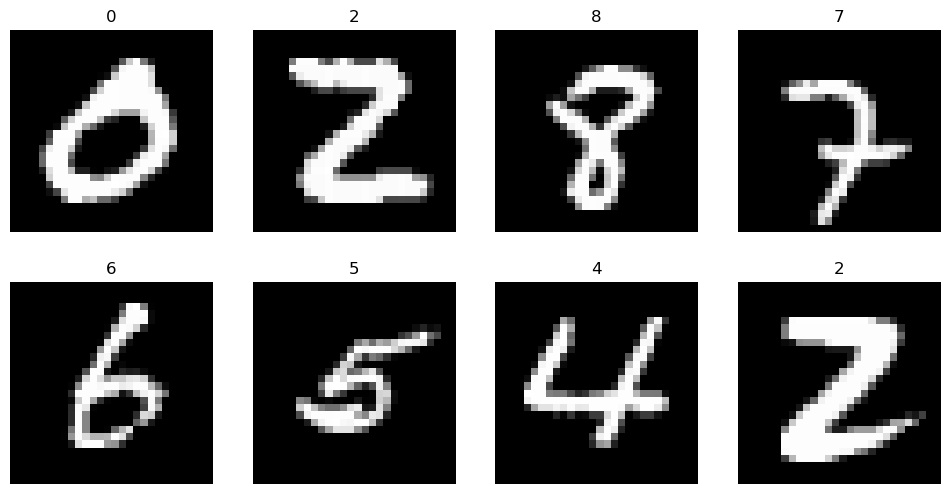

In [104]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(12,6))
cols, rows = 4, 2
for i in range(1, cols * rows + 1): # batch_size인 8개만 2행,4열로 가져오자.
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    # random으로 1~60,000개의 데이터 중에 하나를 선택한다.

    # len(trainset) : 60,000
    # size=(1,) : 1개 차원의 벡터
    # .item() : scaler형태의 tensor를 그냥 실수리스트로 가져옴.
    # 차원이 1인 scaler가 아니면, 사용이 불가능하다.

    img, label = trainset[sample_idx] # trainset의 하나를 랜덤으로 선택해서, img랑 label로 둔다.
    figure.add_subplot(rows, cols, i) # 어떤 영역에 그릴지 선택한다.
    plt.title(label) # 제목은 label로
    plt.axis('off') # 축이름은 없앤다.
    plt.imshow(img.squeeze(), cmap='gray') # img의 흑백차원을 없애고, 회색으로 시각화를 한다.
plt.show()

#### 신경망 구성

- 레이어(layer): 신경망의 핵심 데이터 구조로 하나 이상의 텐서를 입력받아 하나 이상의 텐서를 출력
- 모듈(module): 한 개 이상의 계층이 모여서 구성
- 모델(model): 한 개 이상의 모듈이 모여서 구성


개인적으로는 layer라는 의미보다는 filter가 더 맞다고 생각한다.

##### `torch.nn` 패키지

주로 가중치(weights), 편향(bias)값들이 내부에서 자동으로 생성되는 레이어들을 사용할 때 사용 (`weight`값들을 직접 선언 안함)

https://pytorch.org/docs/stable/nn.html


https://pytorch.org/docs/stable/generated/torch.nn.Module.html

In [105]:
import torch.nn as nn

`nn.Linear` 계층 예제

In [106]:
# input-features
input = torch.randn(128, 20) # (행,열)
print(input, '\n')

# layer
m = nn.Linear(20, 30) # in-features = 20, out-features = 30, bias(상수항)도 있다.
print(m, '\n')


# output
# input에 함수형태로 layer 적용
output = m(input)
print(output, '\n')

print(input.size())
print(output.size())

tensor([[-0.4703,  0.8711,  0.6710,  ...,  0.7780,  1.2070, -0.0776],
        [-0.9438,  0.9077, -0.9788,  ...,  0.3224,  0.7876, -0.7919],
        [ 1.3431, -0.3505,  0.0531,  ...,  0.2083,  0.9548,  0.9194],
        ...,
        [-0.3366, -0.7385, -0.6026,  ...,  0.7535, -0.1292,  0.7381],
        [ 1.0783,  1.1074, -0.7826,  ..., -0.7372, -0.1183, -0.3679],
        [ 0.4651, -1.2115,  1.3536,  ...,  0.8274, -1.1780, -0.2009]]) 

Linear(in_features=20, out_features=30, bias=True) 

tensor([[ 0.2132, -0.1411, -0.1424,  ...,  0.4738, -0.5429, -0.2835],
        [-0.7107, -0.7142,  0.0461,  ...,  0.1994, -0.7549,  0.1458],
        [-0.0675, -0.2269,  0.1761,  ..., -0.6283, -0.2295,  0.0848],
        ...,
        [ 0.0995, -0.1208,  0.2891,  ...,  0.2532, -0.3098,  0.1847],
        [-0.0404,  0.0544, -0.4886,  ...,  0.9905,  0.2586,  0.4359],
        [ 0.2620,  0.4798,  0.1914,  ...,  0.4958, -0.1523, -0.1829]],
       grad_fn=<AddmmBackward0>) 

torch.Size([128, 20])
torch.Size([128, 30]

`nn.Conv2d` 계층 예시
* Conv2d : 2차원 convolution-layer


In [107]:
input = torch.randn(20, 16, 50, 100)
print(input.size())

torch.Size([20, 16, 50, 100])


In [108]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=3, stride=2)
m

Conv2d(16, 33, kernel_size=(3, 3), stride=(2, 2))

In [109]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=(3,5), stride=(2,1), padding=(4,2))
m

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))

In [110]:
m = nn.Conv2d(in_channels=16, out_channels=33, kernel_size=(3,5), stride=(2,1), padding=(4,2), dilation=(3,1))
m

Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))

In [111]:
output = m(input)
output.size()

torch.Size([20, 33, 26, 100])

##### 컨볼루션 레이어(Convolution Layers)

`nn.Conv2d` 예제

- `in_channels`: channel의 갯수
- `out_channels`: 출력 채널의 갯수
- `kernel_size`: 커널(필터) 사이즈

In [112]:
nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [113]:
nn.Conv2d(1, 20, 5, 1)

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [114]:
layer = nn.Conv2d(1, 20, 5, 1).to(torch.device('cpu')) # cpu에 저장
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

`weight` 확인

In [115]:
weight = layer.weight
weight.shape # weight(가중치)의 크기; (20,1) : in & out channels를 맞추기 위한 크기 / (5,5) : kernel(filter)-size

torch.Size([20, 1, 5, 5])

`weight`는 `detach()`를 통해 꺼내줘야 `numpy()`변환이 가능

In [116]:
weight = weight.detach()

In [117]:
weight = weight.numpy()
type(weight) # numpy

numpy.ndarray

In [118]:
weight.shape

(20, 1, 5, 5)

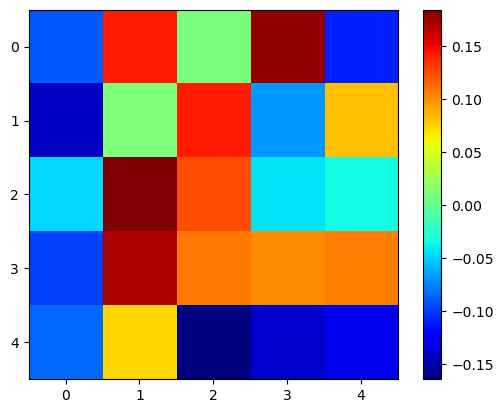

In [119]:
# imshow : numpy-matrix값을 시각화해준다.

plt.imshow(weight[0, 0, :, :], 'jet') # 'jet' : 화려하게
plt.colorbar()
plt.show()

In [120]:
print(images.shape) # 이전에 사용한 MNIST로부터 가져온 image데이터
print(images[0].size()) # 8 = batch_size, 1 = 흑/백, 28x28 pixel-size

input_image = torch.squeeze(images[0])
# images[0] : 한 batch당 8개의 데이터(사진)가 있는데, 이중에서 한개의 사진을 가져온다.
# squeeze() : 1 = 흑/백 의 차원을 제거한다.
print(input_image.size())

torch.Size([8, 1, 28, 28])
torch.Size([1, 28, 28])
torch.Size([28, 28])


In [121]:
input_data = torch.unsqueeze(images[0], dim=0) # 이전에 squeeze로 차원을 줄였는데, 다시 키워주자
print(input_data.size(), '\n')

torch.Size([1, 1, 28, 28]) 



In [122]:
output_data = layer(input_data)
output_data # grad_fn 도 포함되어 나온다.

tensor([[[[-0.1272, -0.1272, -0.1272,  ..., -0.1272, -0.1272, -0.1272],
          [-0.1272, -0.1272, -0.1272,  ..., -0.3036, -0.2211, -0.1278],
          [-0.1272, -0.1272, -0.1272,  ..., -0.3447, -0.2346, -0.1713],
          ...,
          [-0.1272, -0.1272, -0.2334,  ..., -0.1272, -0.1272, -0.1272],
          [-0.1272, -0.1272, -0.1315,  ..., -0.1272, -0.1272, -0.1272],
          [-0.1272, -0.1272, -0.1272,  ..., -0.1272, -0.1272, -0.1272]],

         [[-0.3564, -0.3564, -0.3564,  ..., -0.3564, -0.3564, -0.3564],
          [-0.3564, -0.3564, -0.3564,  ..., -0.1817, -0.3021, -0.3634],
          [-0.3564, -0.3564, -0.3564,  ..., -0.3824, -0.2720, -0.4317],
          ...,
          [-0.3564, -0.3564, -0.2376,  ..., -0.3564, -0.3564, -0.3564],
          [-0.3564, -0.3564, -0.3518,  ..., -0.3564, -0.3564, -0.3564],
          [-0.3564, -0.3564, -0.3564,  ..., -0.3564, -0.3564, -0.3564]],

         [[ 0.3601,  0.3601,  0.3601,  ...,  0.3601,  0.3601,  0.3601],
          [ 0.3601,  0.3601,  

In [123]:
output_data.size()

torch.Size([1, 20, 24, 24])

In [124]:
output = output_data.data # data값만 추출해서 얻을 수 있다.
output

tensor([[[[-0.1272, -0.1272, -0.1272,  ..., -0.1272, -0.1272, -0.1272],
          [-0.1272, -0.1272, -0.1272,  ..., -0.3036, -0.2211, -0.1278],
          [-0.1272, -0.1272, -0.1272,  ..., -0.3447, -0.2346, -0.1713],
          ...,
          [-0.1272, -0.1272, -0.2334,  ..., -0.1272, -0.1272, -0.1272],
          [-0.1272, -0.1272, -0.1315,  ..., -0.1272, -0.1272, -0.1272],
          [-0.1272, -0.1272, -0.1272,  ..., -0.1272, -0.1272, -0.1272]],

         [[-0.3564, -0.3564, -0.3564,  ..., -0.3564, -0.3564, -0.3564],
          [-0.3564, -0.3564, -0.3564,  ..., -0.1817, -0.3021, -0.3634],
          [-0.3564, -0.3564, -0.3564,  ..., -0.3824, -0.2720, -0.4317],
          ...,
          [-0.3564, -0.3564, -0.2376,  ..., -0.3564, -0.3564, -0.3564],
          [-0.3564, -0.3564, -0.3518,  ..., -0.3564, -0.3564, -0.3564],
          [-0.3564, -0.3564, -0.3564,  ..., -0.3564, -0.3564, -0.3564]],

         [[ 0.3601,  0.3601,  0.3601,  ...,  0.3601,  0.3601,  0.3601],
          [ 0.3601,  0.3601,  

In [125]:
output_arr = output.numpy()
output_arr

array([[[[-0.12718391, -0.12718391, -0.12718391, ..., -0.12718391,
          -0.12718391, -0.12718391],
         [-0.12718391, -0.12718391, -0.12718391, ..., -0.30359837,
          -0.22114277, -0.12780553],
         [-0.12718391, -0.12718391, -0.12718391, ..., -0.34468994,
          -0.23463213, -0.17132941],
         ...,
         [-0.12718391, -0.12718391, -0.2334159 , ..., -0.12718391,
          -0.12718391, -0.12718391],
         [-0.12718391, -0.12718391, -0.13149166, ..., -0.12718391,
          -0.12718391, -0.12718391],
         [-0.12718391, -0.12718391, -0.12718391, ..., -0.12718391,
          -0.12718391, -0.12718391]],

        [[-0.35644662, -0.35644662, -0.35644662, ..., -0.35644662,
          -0.35644662, -0.35644662],
         [-0.35644662, -0.35644662, -0.35644662, ..., -0.18172112,
          -0.30207384, -0.36343026],
         [-0.35644662, -0.35644662, -0.35644662, ..., -0.38244137,
          -0.27198154, -0.4316789 ],
         ...,
         [-0.35644662, -0.35644662

In [126]:
output_arr.shape

(1, 20, 24, 24)

In [127]:
# input : [1, 1, 28, 28]
# layer : nn.Conv2d(1, 20, 5, 1)
# output : [1, 20, 24, 24]

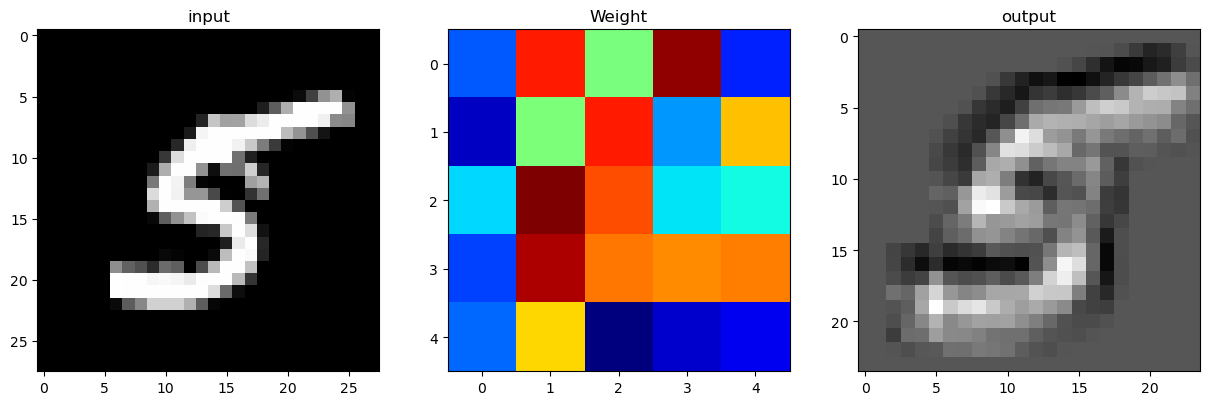

In [128]:
plt.figure(figsize=(15,30))

# input
plt.subplot(131)
plt.title('input')
plt.imshow(input_image, 'gray')

# filter
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet')

# output
plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0,0,:,:], 'gray')
plt.show()

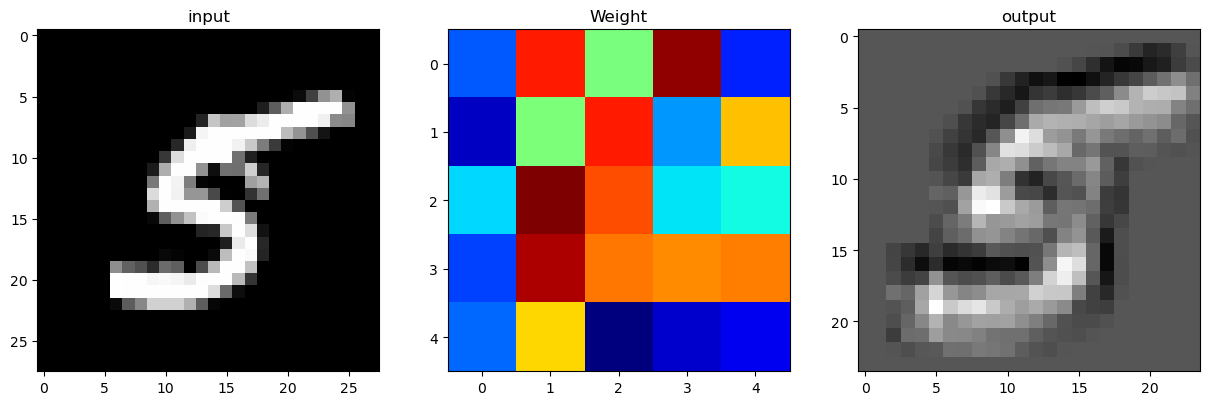

In [129]:
plt.figure(figsize=(15,30))

# input
plt.subplot(131)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray') # 1번쨰 데이터

# filter
plt.subplot(132)
plt.title('Weight')
plt.imshow(weight[0,0,:,:], 'jet') # 가중치를 1겹으로 보았을 때, filter라고 보면 됨

# output
plt.subplot(133)
plt.title('output')
plt.imshow(output_arr[0,0,:,:], 'gray') # 1번째 데이터에 filter를 적용했을 때, 데이터가 어떻게 되는지
plt.show()

##### 풀링 레이어(Pooling layers)

- `F.max_pool2d` 
  - `stride`
  - `kernel_size`
- `torch.nn.MaxPool2d` 도 많이 사용

In [130]:
import torch.nn.functional as F

pool = F.max_pool2d(output, kernel_size=2, stride=2) # 2x2의 필터를 기준으로, 2만큼 이동하면서 큰 것만 뽑아줘

print(output.shape) # 24x24
print(pool.shape) # 12x12

torch.Size([1, 20, 24, 24])
torch.Size([1, 20, 12, 12])


In [131]:
output[0,0,10:14,10:14] # torch는 마지막을 포함한다.; 적용전

tensor([[ 0.0352, -0.2755, -0.3376, -0.1826],
        [ 0.1628, -0.1731, -0.1883, -0.2942],
        [ 0.3496,  0.2189,  0.1587, -0.0912],
        [ 0.1547,  0.1905,  0.1687,  0.0123]])

In [132]:
pool[0,0,5:7,5:7] # maxpool 적용후

tensor([[ 0.1628, -0.1826],
        [ 0.3496,  0.1687]])

- MaxPool Layer는 weight가 없기 때문에 바로 `numpy()`변환 가능

In [133]:
pool_arr = pool.numpy()
pool_arr.shape

(1, 20, 12, 12)

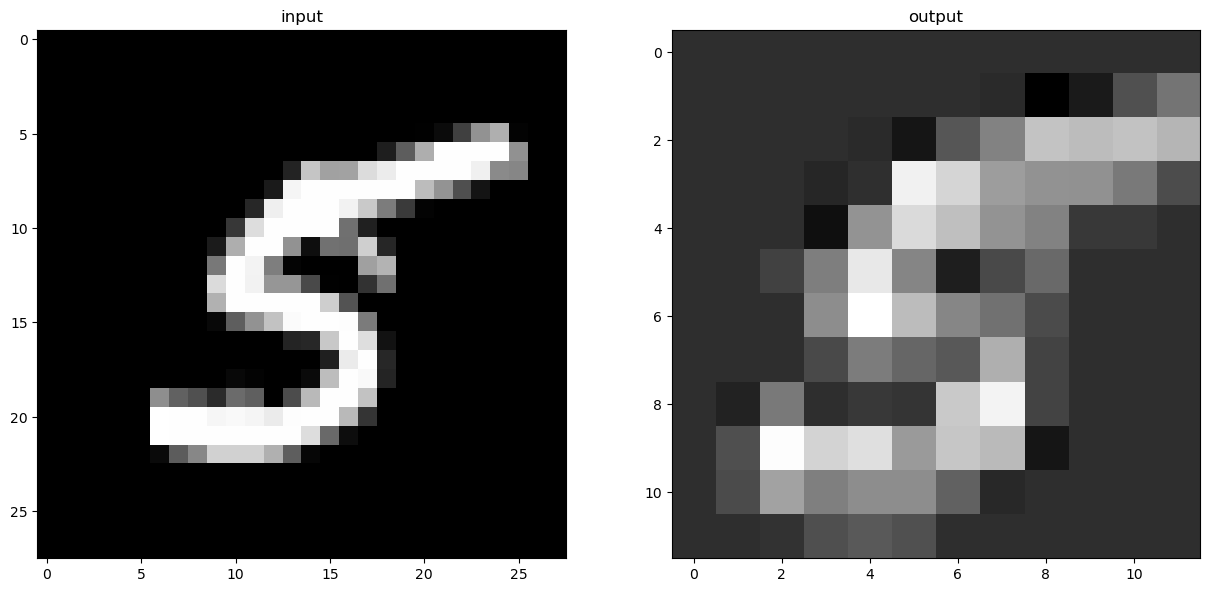

In [134]:
plt.figure(figsize=(15,30))

# input
plt.subplot(121)
plt.title('input')
plt.imshow(images[0,0,:,:], 'gray') # 1번쨰 데이터

# maxpool(2,2) 적용이후
plt.subplot(122)
plt.title('output')
plt.imshow(pool_arr[0,0,:,:], 'gray') # 1번째 데이터에 maxpool-filter를 적용했을 때, 데이터가 어떻게 되는지; 해상도가 줄어들었다.
plt.show()

##### 선형 레이어(Linear layers)

1d만 가능하므로 `.view()`를 통해 1d로 펼쳐줘야함

In [135]:
input_image.shape

torch.Size([28, 28])

In [136]:
# view() : flatten(그냥 펴준다.)

flatten = input_image.view(1, 28 * 28) # 데이터를 펴준다.
flatten.shape

torch.Size([1, 784])

In [137]:
# Linear() : 최종적으로 원하는 사이즈로 만들어준다.

lin = nn.Linear(784, 10)(flatten) # in-features = 784, out-features = 10; 784 -> 10
lin.shape

torch.Size([1, 10])

In [138]:
# 우리가 흔히 아는 MLP에서의 층간의 가중치와 관련

x = nn.Linear(784, 10)
x.weight.shape

torch.Size([10, 784])

In [139]:
# weight의 경우, detach를 해주어야 numpy로 변환이 가능하다.

# lin.numpy()
lin.detach().numpy() # 10개의 값

array([[ 0.04621051,  0.39098468, -0.00726599, -0.13529181,  0.2855916 ,
         0.2182266 ,  0.10472041,  0.05017909,  0.27858847, -0.19364023]],
      dtype=float32)

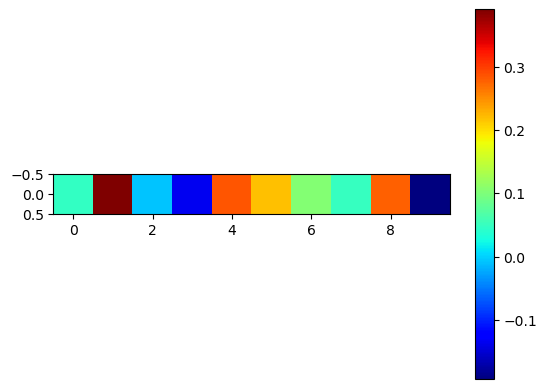

In [140]:
plt.imshow(lin.detach().numpy(), 'jet') # 10개의 linear-node값
plt.colorbar()
plt.show()

##### 비선형 활성화 (Non-linear Activations)

`F.softmax`와 같은 활성화 함수 등

In [141]:
flatten = images[0,0,:,:].view(1, 28 * 28) # flatten 진행
lin = nn.Linear(784, 10)(flatten) # 784 -> 10 으로 원하는 사이즈로 변경
softmax = F.softmax(lin, dim=1) # 최종 결과에 활성화함수 적용

softmax # grad_fn=<SoftmaxBackward0> 이 추가로 나타남; 마지막 연산은 softmax

tensor([[0.0863, 0.1055, 0.0721, 0.1555, 0.0884, 0.1150, 0.0895, 0.0856, 0.1169,
         0.0852]], grad_fn=<SoftmaxBackward0>)

In [142]:
# np.sum(softmax.numpy(), axis=0)

In [143]:
np.sum(softmax.detach().numpy(), axis=1)

array([1.], dtype=float32)

In [144]:
with torch.no_grad(): # 이 안에서는 기울기 계산을 따로 하지 않는다.; 이렇게 해야 나중에 detach() 등을 할 필요가 없다.
    flatten = images[0,0,:,:].view(1, 28 * 28) # flatten 진행
    lin = nn.Linear(784, 10)(flatten) # 784 -> 10 으로 원하는 사이즈로 변경

    softmax = F.softmax(lin, dim=1) # 최종 결과에 활성화함수 적용
# dim=1 : 하나의 행 안에서 열이 각각의 값으로 생각하여, 합이 1이 되도록 prob형태로 만든다.
# 즉, 각 행별로 나눈다음, 열끼리 비교하여 합이 1이 되도록 softmax함수를 적용한다.

softmax

tensor([[0.0781, 0.0815, 0.0843, 0.0735, 0.0797, 0.1250, 0.1353, 0.1475, 0.1145,
         0.0805]])

In [145]:
with torch.no_grad():
    softmax = F.softmax(lin, dim=0) # 최종 결과에 활성화함수 적용
# dim=0 : 각 열별로 나눈다음, 행끼리 비교하여 합이 1이 되도록 softmax함수를 적용한다.

softmax

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [146]:
np.sum(softmax.numpy(), axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

`F.relu`

- ReLU 함수를 적용하는 레이어
- `nn.ReLU`로도 사용 가능

In [147]:
# remark
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# .to(device) : 본래 cpu에 저장된 tensor변수를 gpu에 저장한다.

inputs = torch.randn(4, 3, 28, 28).to(device)
inputs.shape

torch.Size([4, 3, 28, 28])

In [ ]:
# # layer 선언
# layer = nn.Conv2d(3, 20, 5, 1)

# # output 선언; input을 layer에 통과시켜 만든다.
# output = F.relu(layer(inputs))
# output.shape

In [148]:
# layer 선언
layer = nn.Conv2d(3, 20, 5, 1).to(device) # input이 gpu에 저장되면, layer인 weight도 gpu에 저장해주어야한다.

# output 선언; input을 layer에 통과시켜 만든다.
output = F.relu(layer(inputs))
output.shape

torch.Size([4, 20, 24, 24])

#### 신경망 종류

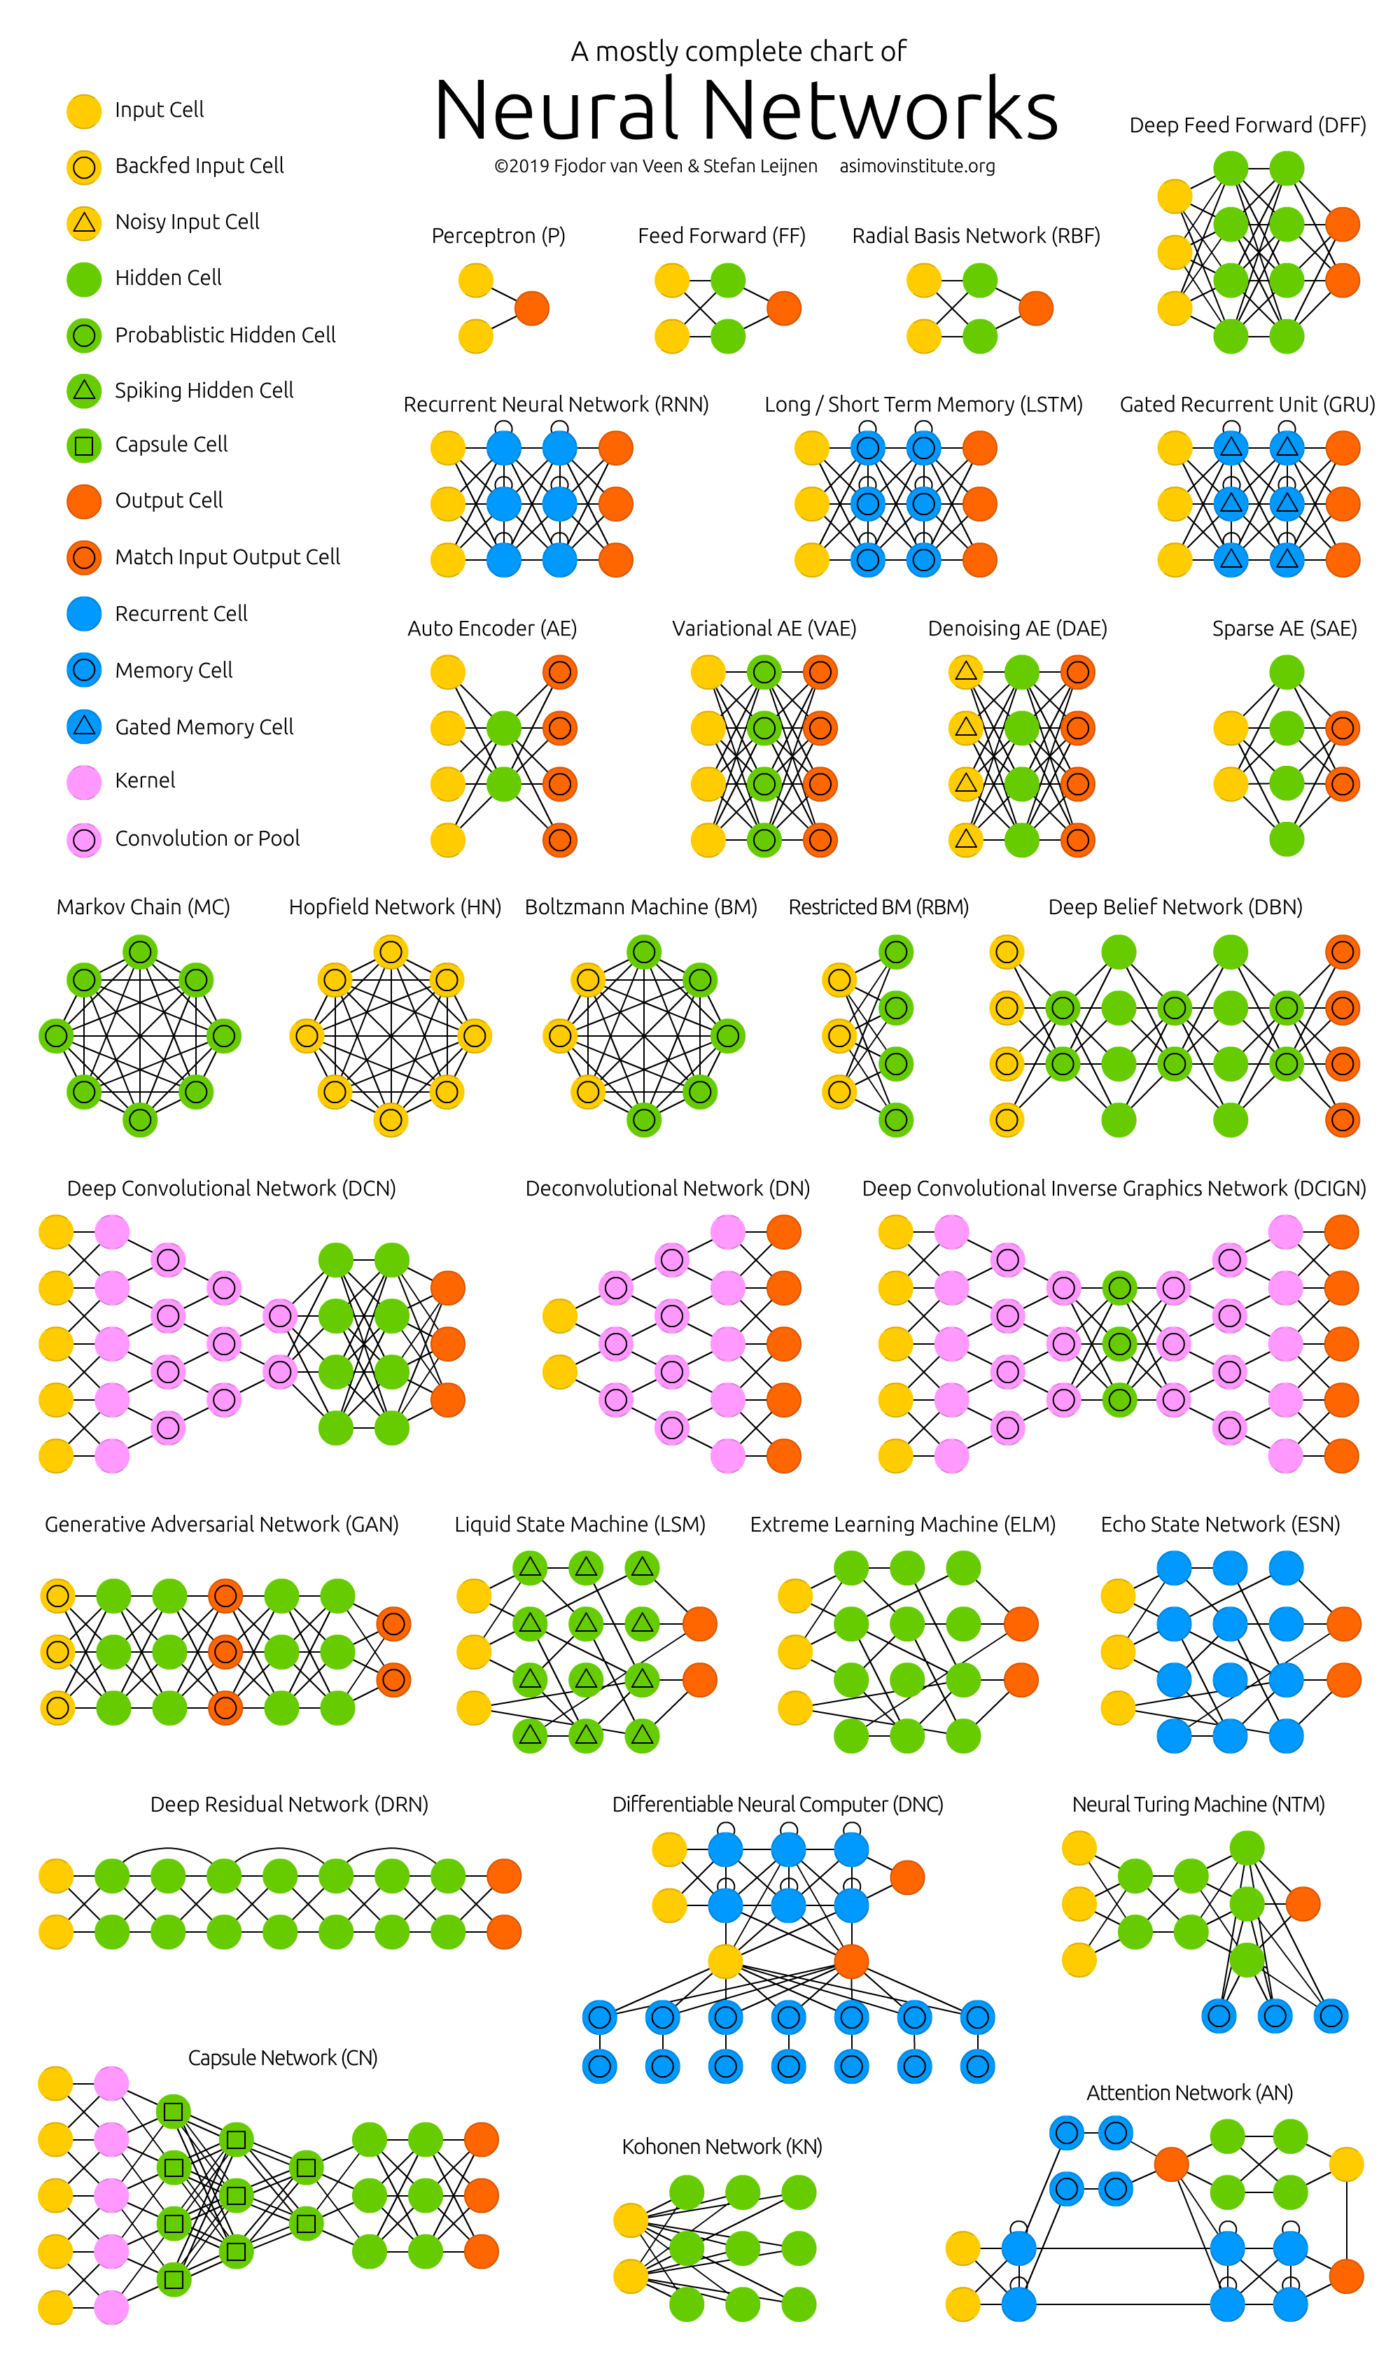

#### 모델 정의


##### `nn.Module` 상속 클래스 정의
- `nn.Module`을 상속받는 클래스 정의
- `__init__()`: 모델에서 사용될 모듈과 활성화 함수 등을 정의
- `forward()`: 모델에서 실행되어야 하는 연산을 정의

In [149]:
class a():
    def __init__(self, inputs):
        self.inputs = inputs

type(a) # type -> class

type

In [150]:
type(nn.Module) # class

type

In [151]:
type(F)

module

In [152]:
class Model(nn.Module): # nn에 있는 Module라는 클래스를 상속한 클래스를 만든다.

    # Model이라는 class에서 사용할 변수 선언
    def __init__(self, inputs): # inputs = 투입되는 변수

        super(Model, self).__init__()
        # 부모 클래스의 __init__() 매직 메소드를 자식 클래스의 __init__() 매직 메소드에서 실행 한다.
        # 즉, 부모 클래스인 nn.Module에서 정의된 변수를 자식 클래스인 Model에서 사용하고 싶을 때, 이용한다.
        # 참고자료 : https://supermemi.tistory.com/entry/Python-3-%ED%8C%8C%EC%9D%B4%EC%8D%AC-%ED%81%B4%EB%9E%98%EC%8A%A4%EC%9D%98-super-%EC%97%90-%EB%8C%80%ED%95%B4-%EC%A0%9C%EB%8C%80%EB%A1%9C-%EC%95%8C%EC%95%84%EB%B3%B4%EC%9E%90-superinit-super%EC%9D%98-%EC%9C%84%EC%B9%98
        # 참고. vs 매서드 오버라이딩
        # 매서드 오바라이딩이란? 부모 클래스에서 사용하는 함수/매서드 중 일부를 변경해서 사용한다.
        # 참고자료 : https://junior-datalist.tistory.com/96

        self.layer = nn.Linear(inputs, 1) # layer변수를 inputs -> 1 로 바꾸는 Linear로 정의
        self.activation = nn.Sigmoid() # activation변수를 Sigmoid라는 활성화함수로 정의


    # 위에서 정의한 변수들을 가지고, 직접 NN 구조를 만들어보자.
    def forward(self, x): # x : input-data

        x = self.layer(x) # 먼저, input-data를 layer변수로 정의된 'Linear()' layer를 통과시켜 inputs -> 1 사이즈로 만든다.
        x = self.activation(x) # 계속해서, 1로 사이즈를 줄인 데이터에 activation변수로 정의된 'Sigmoid()' 활성화함수를 이용해 최종적으로 값을 낸다.

        return x

In [153]:
model = Model(1) # inputs가 1인 Model class를 model변수로 정의한다.
print(list(model.children()), '\n\n') # 만든 model의 구조를 살펴본다. nn.Module에 있는 함수/매서드 'children()'

print(list(model.modules()), '\n\n') # 위의 children() 보다 더 많은 정보를 제공
print(list(model.modules())[0], '\n')
print(list(model.modules())[1], '\n') # children() 과 같다.

[Linear(in_features=1, out_features=1, bias=True), Sigmoid()] 


[Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
), Linear(in_features=1, out_features=1, bias=True), Sigmoid()] 


Model(
  (layer): Linear(in_features=1, out_features=1, bias=True)
  (activation): Sigmoid()
) 

Linear(in_features=1, out_features=1, bias=True) 



##### `nn.Sequential`을 이용한 신경망 정의
- `nn.Sequential` 객체로 그 안에 각 모듈을 순차적으로 실행
- `__init__()`에서 사용할 네트워크 모델들을 `nn.Sequential`로 정의 가능
- `forward()`에서 실행되어야 할 계산을 가독성 높게 작성 가능

remark) 모듈 = layer가 2개 이상 있을 때, 즉, nn.Sequential은 2개 이상의 layer나 activation-function을 묶어서 정의할 때, 사용한다.

In [154]:
class Model(nn.Module):

    # 사용할 변수 선언
    def __init__(self):
        super(Model, self).__init__()
        # 여기까지는 동일하다.


        # layer를 하나하나 정의하지 않고, 묶어서 정의한다.

        # 1번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer1 = nn.Sequential( # layer라는 변수를 Sequential()라는 걸 통해 정의                       
            # 3 -> 64, filter-size = 5x5
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5), # 1번쨰 layer
            nn.ReLU(inplace=True), # 2번째 활성화함수
            # F.relu와 동일
            nn.MaxPool2d(2) # 3번쨰 max-pooling
        )

        # 2번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer2 = nn.Sequential(                    
            # 64 -> 30, filter-size = 5x5
            nn.Conv2d(in_channels=64, out_channels=30, kernel_size=5), # 1번쨰 layer
            nn.ReLU(inplace=True), # 2번째 활성화함수
            nn.MaxPool2d(2) # 3번쨰 max-pooling
        )

        # 3번째 layer의 집합인 모듈을 layer변수라는 변수로 저장
        self.layer3 = nn.Sequential(
            # 여기서 주의할 점은 30x5x5 짜리 matrix를 어떻게 1x1x(30*5*5)짜리 matrix로 바꿀 수 있냐인데,
            # 이후의 forward() 과정에서 view(1, 30*5*5)를 통해 flatten을 해준다.
            # 30*5*5 -> 10
            nn.Linear(in_features=30*5*5, out_features=10, bias=True),
            nn.ReLU(inplace=True)
        )

    # 선언한 변수들을 가지고 NN 구조 형성
    def forward(self, x):
        #
        x = self.layer1(x) # Sequential()로 만든 layer1이라는 layer집합들 적용
        x = self.layer2(x) # Sequential()로 만든 layer2이라는 layer집합들 적용
        x = x.view(x.shape[0], -1) # Linear적용전에 flatten을 해준다.
        x = self.layer3(x) # Sequential()로 만든 layer2이라는 layer집합들 적용
        return x

In [155]:
# nn에서 ReLU()() 가져오기

nn.ReLU()(torch.tensor(1))

tensor(1)

In [156]:
# nn.functional에서 relu() 가져오기
import torch.nn.functional as F

F.relu(torch.tensor(1))

tensor(1)

In [157]:
model = Model()

print(list(model.children()), '\n\n')
print('-'*100)
print(list(model.modules()), '\n')

[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)] 


----------------------------------------------------------------------------------------------------
[Model(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 30, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0)

##### 파이토치 사전학습 모델

* https://pytorch.org/vision/stable/models.html

#### 모델 파라미터


##### 손실 함수(Loss function)

* 예측 값과 실제 값 사이의 오차 측정
* 학습이 진행되면서 해당 과정이 얼마나 잘 되고 있는지 나타내는 지표
* 모델이 훈련되는 동안 최소화될 값으로 주어진 문제에 대한 성공 지표
* 손실 함수에 따른 결과를 통해 학습 파라미터를 조정
* 최적화 이론에서 최소화 하고자 하는 함수
* 미분 가능한 함수 사용
* 파이토치의 주요 손실 함수
  - `torch.nn.BCELoss`: 이진 분류를 위해 사용
  - `torch.nn.CrossEntropyLoss`: 다중 클래스 분류를 위해 사용
  - `torch.nn.MSELoss`: 회귀 모델에서 사용

In [158]:
criterion = nn.MSELoss()
criterion = nn.CrossEntropyLoss()
criterion = nn.MSELoss()

##### 옵티마이저(Optimizer)

* 손실 함수를 기반으로 모델이 어떻게 업데이트되어야 하는지 결정 (특정 종류의 확률적 경사 하강법 구현)
* optimizer는 `step()`을 통해 전달받은 파라미터를 모델 업데이트
* 모든 옵티마이저의 기본으로 `torch.optim.Optimizer(params, defaults)` 클래스 사용
* `zero_grad()`를 이용해 옵티마이저에 사용된 파라미터들의 기울기를 0으로 설정
* `torch.optim.lr_scheduler`를 이용해 에포크(epochs)에 따라 학습률(learning rate) 조절
* 파이토치의 주요 옵티마이저: `optim.Adadelta`, `optim.Adagrad`, `optim.Adam`, `optim.RMSprop`, `optim.SGD`

In [159]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.001)
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    lr: 0.001
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

<img src="https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile25.uf.tistory.com%2Fimage%2F222B4F4F562BD0330EA41C">

##### 학습률 스케줄러(Learning rate scheduler)

* 학습시 특정 조건에 따라 학습률을 조정하여 최적화 진행
* 일정 횟수 이상이 되면 학습률을 감소(decay)시키거나 전역 최소점(global minimum) 근처에 가면 학습률을 줄이는 등
* 파이토치의 학습률 스케줄러 종류
  - `optim.lr_scheduler.LambdaLR`: 람다(lambda) 함수를 이용해 그 결과를 학습률로 설정
  - `optim.lr_scheduler.StepLR`: 단계(step)마다 학습률을 감마(gamma) 비율만큼 감소
  - `optim.lr_scheduler.MultiStepLR`: `StepLR`과 비슷하지만 특정 단계가 아니라 지정된 에포크에만 감마 비율로 감소
  - `optim.lr_scheduler.ExponentialLR`: 에포크마다 이전 학습률에 감마만큼 곱함
  - `optim.lr_scheduler.CosineAnnealingLR`: 학습률을 코사인(cosine) 함수의 형태처럼 변화시켜 학습률일 커지기도 하고 작아지기도 함
  - `optim.lr_scheduler.ReduceLROnPlateau`: 학습이 잘되는지 아닌지에 따라 동적으로 학습률 변화

##### 지표(Metrics)

* 모델의 학습과 테스트 단계를 모니터링

In [160]:
!pip install torchmetrics

In [161]:
# 분류문제

# 계산된 output(y_pred; y_pred)와 실제 output(y_label; target) 정의

preds = torch.randn(10,5) # 10개의 데이터, 5개의 class
print(preds, '\n')

preds = torch.randn(10,5).softmax(dim=-1) # 마지막 차원기준
print(preds, '\n') # 즉, 행을 기준으로 행마다 쪼개, 각 행안에서의 열의 prob 합이 1이된다.

sum = np.sum(preds.detach().numpy(), axis=1)
print(sum, '\n')

y_pred = np.argmax(preds.detach().numpy(), axis=1)
print(y_pred, '\n')

target = torch.randint(5, (10,)) # 10짜리 matrix를 랜덤으로 생성
print(target, '\n')

print('acc :', len(np.where(y_pred == target.detach().numpy())[0]) / 10)

tensor([[ 1.8332,  0.5339,  0.5528,  0.9066,  0.5441],
        [ 0.1412, -0.5273, -0.1793, -1.0310, -0.1415],
        [-0.1386, -2.5374, -1.8075,  0.7763,  0.2372],
        [ 0.3165, -0.8426,  1.0698, -1.0521, -0.7158],
        [ 0.3843,  2.1193,  1.6943,  0.4633,  0.6219],
        [ 0.3725,  0.5208, -0.4384, -0.7432, -0.8604],
        [ 1.0240, -1.0995,  0.2960, -0.7286,  0.1909],
        [ 1.3983,  0.3967,  0.3444,  0.3230,  0.9194],
        [-1.5252,  1.7306, -0.1390, -1.0718, -0.3854],
        [-0.8366,  0.0936,  0.6241, -0.5363,  0.2764]]) 

tensor([[0.5352, 0.2227, 0.1865, 0.0316, 0.0240],
        [0.0734, 0.5400, 0.1145, 0.1912, 0.0809],
        [0.0853, 0.0573, 0.0413, 0.8047, 0.0114],
        [0.3362, 0.2097, 0.0424, 0.2017, 0.2100],
        [0.5203, 0.1472, 0.1589, 0.0807, 0.0929],
        [0.4931, 0.1082, 0.2653, 0.0470, 0.0865],
        [0.2054, 0.2667, 0.0873, 0.2624, 0.1781],
        [0.3956, 0.0606, 0.2022, 0.2482, 0.0935],
        [0.4948, 0.1626, 0.1862, 0.0310, 0.1254

In [162]:
# 평가함수

import torchmetrics

torchmetrics.functional.accuracy(preds, target, task="multiclass", num_classes=5)

tensor(0.1000)

multi-class vs multi-label
* https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sw4r&logNo=221714823560

In [163]:
metric = torchmetrics.Accuracy(task="multiclass", num_classes=5)
# 이렇게 해서 accuracy 함수를 따로 가져올수도 있다.

n_batches = 10 # 10번 정도 이러한 행위를 반복

for i in range(n_batches):

    preds = torch.randn(10, 5).softmax(dim=-1)
    target = torch.randint(5, (10, ))

    acc = metric(preds, target)
    print(acc)

acc = metric.compute()
print(acc)

tensor(0.1000)
tensor(0.2000)
tensor(0.)
tensor(0.2000)
tensor(0.2000)
tensor(0.3000)
tensor(0.4000)
tensor(0.3000)
tensor(0.3000)
tensor(0.1000)
tensor(0.2100)


### CNN 모델구현 1
* Regression Model

#### 선형 회귀 모델(Linear Regression Model)

##### 데이터 생성

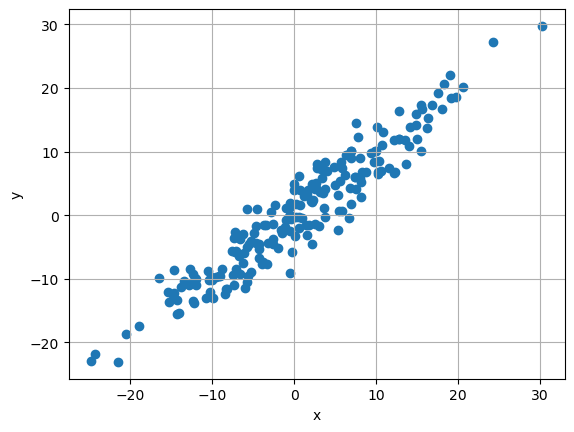

In [164]:
X  = torch.randn(200, 1) * 10
y = X + 3 * torch.randn(200, 1) # y = x + 3
plt.scatter(X.numpy(), y.numpy())
plt.ylabel('y')
plt.xlabel('x')
plt.grid()
plt.show()

##### 모델 정의 및 파라미터

In [165]:
class LRModel(nn.Module):
    
    # 클래스 내에서 사용할 변수선언
    def __init__(self):
        super(LRModel, self).__init__()
        self.linear = nn.Linear(1,1) # 1 -> 1; x값 1개로, y값 1개를 유추하는 문제이다.
    
    # nn 구조 형성
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [166]:
model = LRModel()
print(model, '\n')
print(list(model.parameters()))

LRModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
) 

[Parameter containing:
tensor([[0.3130]], requires_grad=True), Parameter containing:
tensor([-0.9539], requires_grad=True)]


In [167]:
w, b = model.parameters()

# w
print(w, '\n')
print(w[0], '\n')
print(w[0][0], '\n')
print(w[0][0].item(), '\n') # 2개의 대괄호로 둘러쌓여 있다.
print('-'*50)

# b
print(b, '\n')
print(b[0], '\n')
print(b[0].item(), '\n') # 1개의 대괄호로 둘러쌓여 있다.

Parameter containing:
tensor([[0.3130]], requires_grad=True) 

tensor([0.3130], grad_fn=<SelectBackward0>) 

tensor(0.3130, grad_fn=<SelectBackward0>) 

0.3129911422729492 

--------------------------------------------------
Parameter containing:
tensor([-0.9539], requires_grad=True) 

tensor(-0.9539, grad_fn=<SelectBackward0>) 

-0.9539089202880859 



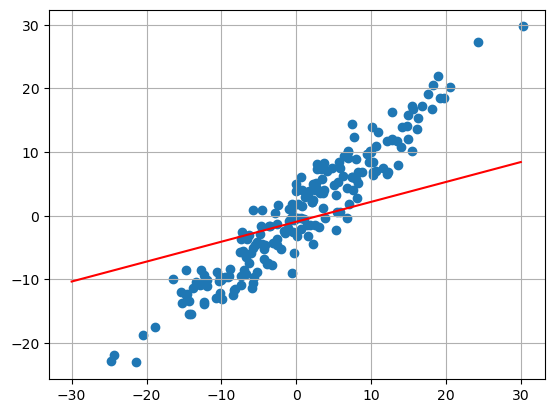

In [168]:
w, b = model.parameters()

w1, b1 = w[0][0].item(), b[0].item() # 그냥 들어있는 초기값
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1, 'r')
plt.scatter(X,y)
plt.grid()
plt.show()

##### 손실 함수 및 옵티마이저

In [169]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

In [170]:
list(model.parameters())

[Parameter containing:
 tensor([[0.3130]], requires_grad=True),
 Parameter containing:
 tensor([-0.9539], requires_grad=True)]

#### 모델 학습

##### 전체 과정

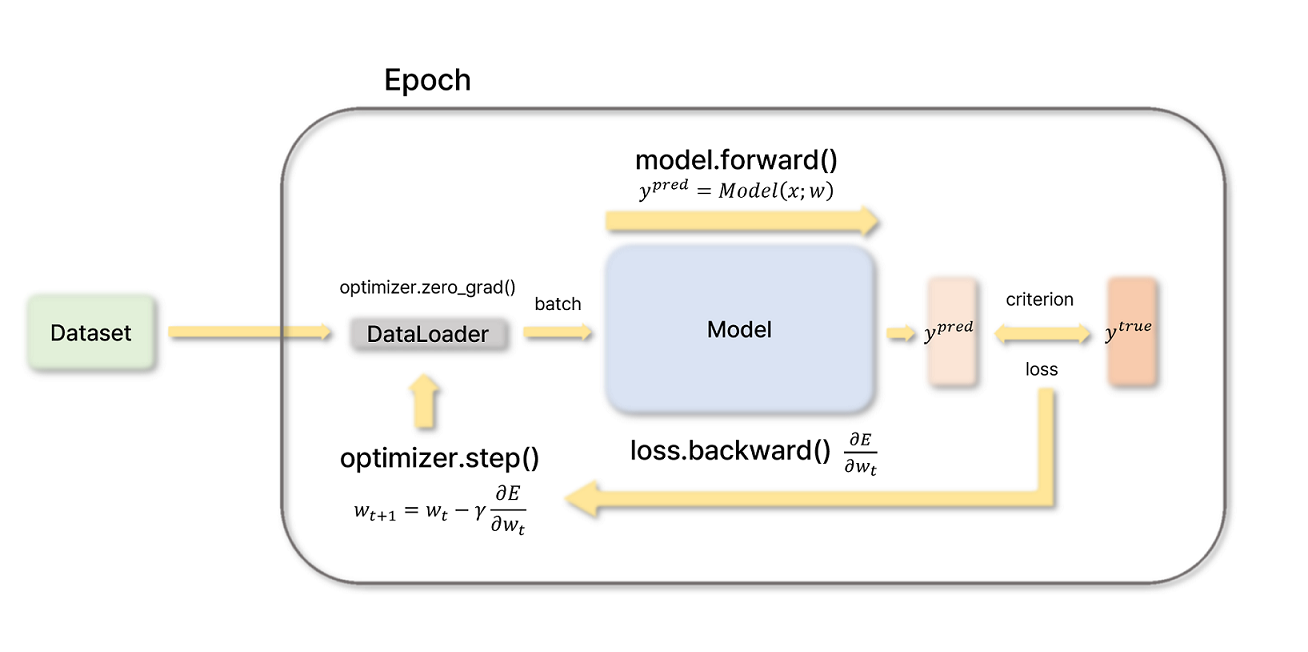

##### 전체적인 변수 확인

In [171]:
epochs = 3 # epochs : 1번의 epochs당 데이터 전체를 통해 학습을 한 것이다.
# mini-batch Gradient Descent에서 모든 미니 배치가 가중치 학습에 한 번씩 사용되면 '1-epoch'가 진행되었다고 한다.

loss_list = [] # loss 변화 저장 장소
loss_list1 = []

for epoch in range(epochs): 
    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X) # model에 넣어 예측
    # list(model.children()) -> [Linear(in_features=1, out_features=1, bias=True)]

    loss = criterion(y_pred, y) # MSE로 손실함수 계산
    loss_list.append(loss.item()) # tensor -> list
    loss_list1.append(loss)

    loss.backward() # gradient 계산

    optimizer.step() # weight-update

In [172]:
list(model.children())

[Linear(in_features=1, out_features=1, bias=True)]

In [173]:
X.shape

torch.Size([200, 1])

In [174]:
model(X).shape

torch.Size([200, 1])

In [175]:
loss_list # list

[48.608524322509766, 34.88548278808594, 25.961408615112305]

In [176]:
loss_list1 # tensor; grad_fn=MSE -> 마지막 연산 = MSE 평가함수

[tensor(48.6085, grad_fn=<MseLossBackward0>),
 tensor(34.8855, grad_fn=<MseLossBackward0>),
 tensor(25.9614, grad_fn=<MseLossBackward0>)]

##### 어떤 값을 관찰해야할까?
* train-parameter / weights

In [177]:
# loss, y_pred, y

epochs = 3

loss_list = []

for epoch in range(epochs):

    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    # 처음 시작된 변수가 아님으로, .grad에는 None이 저장됨
    print(loss.grad, loss.grad_fn) # MSE
    print(y_pred.grad, y_pred.grad_fn) # Add
    print(y.grad, y.grad_fn, '\n') # None

    optimizer.step()

None <MseLossBackward0 object at 0x000001A0A32A8C10>
None <AddmmBackward0 object at 0x000001A0A32A8A00>
None None 

None <MseLossBackward0 object at 0x000001A0A32A8A00>
None <AddmmBackward0 object at 0x000001A0A32A8A00>
None None 

None <MseLossBackward0 object at 0x0000019F9C894AC0>
None <AddmmBackward0 object at 0x0000019F9C894AC0>
None None 



C:\Users\user\AppData\Local\Temp\ipykernel_13440\3909419890.py:18: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print(loss.grad, loss.grad_fn) # MSE
C:\Users\user\AppData\Local\Temp\ipykernel_13440\3909419890.py:19: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-le

In [178]:
list(model.parameters())

# remark
# w, b = model.parameters()

[Parameter containing:
 tensor([[0.7745]], requires_grad=True),
 Parameter containing:
 tensor([-0.9409], requires_grad=True)]

In [179]:
# w, b, w[0][0], b[0]

epochs = 3

loss_list = []

for epoch in range(epochs):

    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    # 가중치(weights)이자 parameter값인 w와 b가 gradient로 계산된다.
    # 참고로, indexing을 하면 이것도 계산으로 들어간다.
    print('w :', w, w.grad, w.grad_fn)
    print('b :', b, b.grad, b.grad_fn, '\n')
    print('w :', w[0][0], w[0][0].grad, w[0][0].grad_fn)
    print('b :', b[0], b[0].grad, b[0].grad_fn)
    print('-'*50, '\n')

    optimizer.step()

w : Parameter containing:
tensor([[0.7745]], requires_grad=True) tensor([[-33.8720]]) None
b : Parameter containing:
tensor([-0.9409], requires_grad=True) tensor([-1.9037]) None 

w : tensor(0.7745, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x0000019F9C884940>
b : tensor(-0.9409, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x0000019F9C884940>
-------------------------------------------------- 

w : Parameter containing:
tensor([[0.8083]], requires_grad=True) tensor([[-27.3113]]) None
b : Parameter containing:
tensor([-0.9390], requires_grad=True) tensor([-1.8618]) None 

w : tensor(0.8083, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x000001A0A32D8220>
b : tensor(-0.9390, grad_fn=<SelectBackward0>) None <SelectBackward0 object at 0x0000019F9C884940>
-------------------------------------------------- 

w : Parameter containing:
tensor([[0.8356]], requires_grad=True) tensor([[-22.0209]]) None
b : Parameter containing:
tensor([-0.9371], requi

C:\Users\user\AppData\Local\Temp\ipykernel_13440\2558656669.py:21: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\build\aten\src\ATen/core/TensorBody.h:494.)
  print('w :', w[0][0], w[0][0].grad, w[0][0].grad_fn)
C:\Users\user\AppData\Local\Temp\ipykernel_13440\2558656669.py:22: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad

떄에 따라 값의 변화가 작다면, 모델이 계속 누적되어 학습되기 때문임으로 위의 모델 재정의 후에 다시 학습해야한다.

##### 1. optimizer.zero_grad()
* 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화


In [180]:
# 매 epoch 마다 'optimizer'의 gradient를 초기화해주었을 때

epochs = 10

w_grad_list = []
b_grad_list = []

for epoch in range(epochs):

    optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list.append(w.grad.item())
    b_grad_list.append(b.grad.item())

    optimizer.step()

In [181]:
# 매 epoch 마다 'optimizer'의 gradient를 초기화해주지 않을 때,
# 이전 epoch의 gradient값이 다음 epoch의 gradient에 누적되어 들어간다.

epochs = 10

w_grad_list_no_zero = []
b_grad_list_no_zero = []

for epoch in range(epochs):

    # optimizer.zero_grad() # 각 epochs마다 optimizer에서 처음 gradient를 0으로 초기화

    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list_no_zero.append(w.grad.item())
    b_grad_list_no_zero.append(b.grad.item())

    optimizer.step()

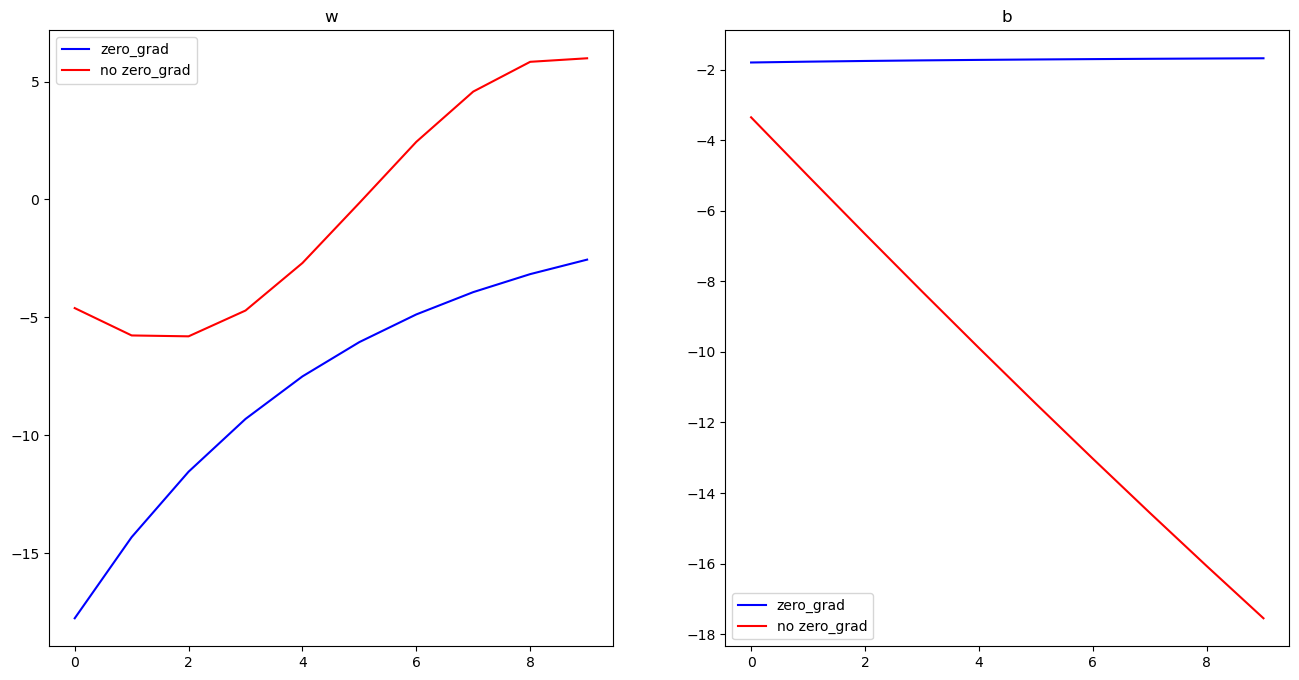

In [182]:
plt.figure(figsize=(16, 8))

# w
plt.subplot(1,2,1)
plt.plot(range(len(w_grad_list)), w_grad_list, color='blue', label='zero_grad')
plt.plot(range(len(w_grad_list_no_zero)), w_grad_list_no_zero, color='red', label='no zero_grad')
plt.legend()
plt.title('w')

# b
plt.subplot(1,2,2)
plt.plot(range(len(b_grad_list)), b_grad_list, color='blue', label='zero_grad')
plt.plot(range(len(b_grad_list_no_zero)), b_grad_list_no_zero, color='red', label='no zero_grad')
plt.legend()
plt.title('b')

plt.show()

# gradient를 매 epochs마다 0으로 만들지 않으면, 이전 gradient가 누적되어 이상하게 된다.
# 아래 결과도 no zero_grad의 크기가 엄청 크게 나온다.

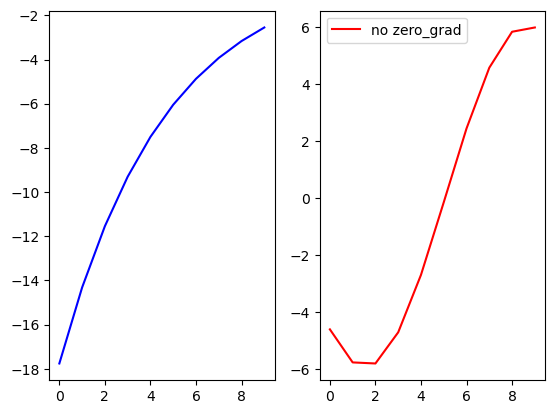

In [183]:
# w

plt.subplot(1,2,1)
plt.plot(range(len(w_grad_list)), w_grad_list, color='blue', label='zero_grad')
plt.subplot(1,2,2)
plt.plot(range(len(w_grad_list_no_zero)), w_grad_list_no_zero, color='red', label='no zero_grad')
plt.legend()
plt.show()

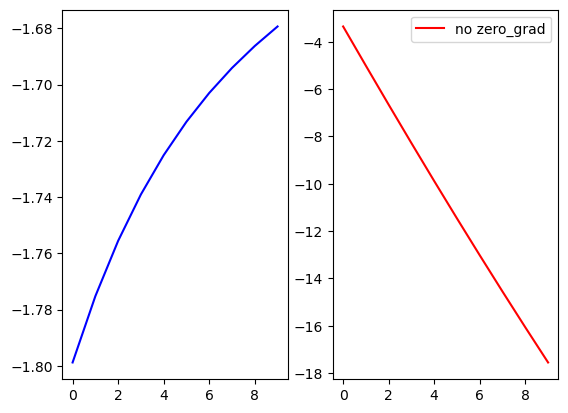

In [184]:
# b

plt.subplot(1,2,1)
plt.plot(range(len(b_grad_list)), b_grad_list, color='blue', label='zero_grad')
plt.subplot(1,2,2)
plt.plot(range(len(b_grad_list_no_zero)), b_grad_list_no_zero, color='red', label='no zero_grad')
plt.legend()
plt.show()

##### 2. optimizer.step()
* 해당 epoch안에서 미니배치들로 인한 weight변화를 parameters에 적용하여 parameters값을 update한다.

In [185]:
# optimizer.step() 사용; parameter의 update가 된다.

epochs = 10

# gradient 저장장소
w_grad_list = []
b_grad_list = []
# parameter 저장장소
w_list = []
b_list = []

for epoch in range(epochs):

    optimizer.zero_grad()

    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list.append(w.grad.item())
    b_grad_list.append(b.grad.item())
    w_list.append(w.item())
    b_list.append(b.item())

    optimizer.step()

In [186]:
# optimizer.step() 사용 안함; parameter의 update가 되지 않는다.

epochs = 10

# gradient 저장장소
w_grad_list_no_opt_step = []
b_grad_list_no_opt_step = []
# parameter 저장장소
w_list_no_opt_step = []
b_list_no_opt_step = []

for epoch in range(epochs):

    optimizer.zero_grad()

    y_pred = model(X)
    
    loss = criterion(y_pred, y)
    loss_list.append(loss)
    loss.backward()

    w_grad_list_no_opt_step.append(w.grad.item())
    b_grad_list_no_opt_step.append(b.grad.item())
    w_list_no_opt_step.append(w.item())
    b_list_no_opt_step.append(b.item())

    # optimizer.step()

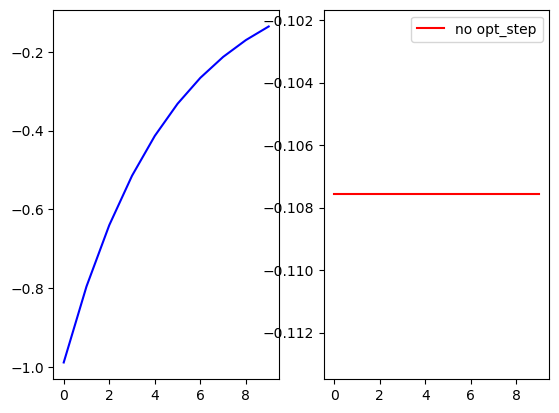

In [188]:
# w-gradient

plt.subplot(1,2,1)
plt.plot(range(len(w_grad_list)), w_grad_list, color='blue', label='opt_step')
plt.subplot(1,2,2)
plt.plot(range(len(w_grad_list_no_opt_step)), w_grad_list_no_opt_step, color='red', label='no opt_step')
plt.legend()
plt.show()

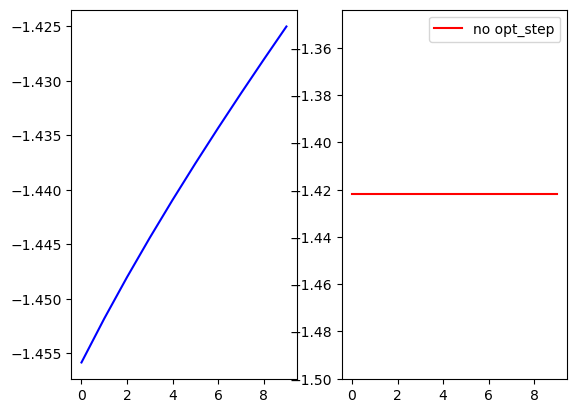

In [189]:
# b-gradient

plt.subplot(1,2,1)
plt.plot(range(len(b_grad_list)), b_grad_list, color='blue', label='opt_step')
plt.subplot(1,2,2)
plt.plot(range(len(b_grad_list_no_opt_step)), b_grad_list_no_opt_step, color='red', label='no opt_step')
plt.legend()
plt.show()

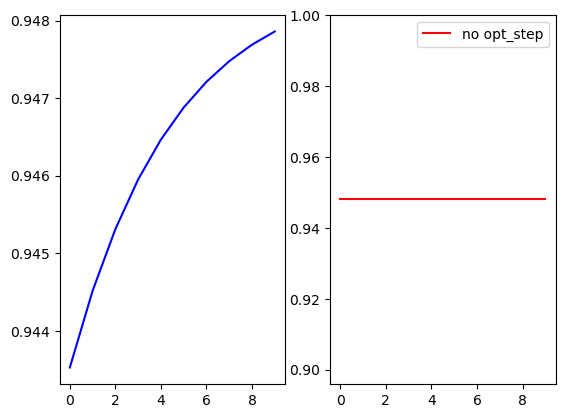

In [190]:
# w-value

plt.subplot(1,2,1)
plt.plot(range(len(w_list)), w_list, color='blue', label='opt_step')
plt.subplot(1,2,2)
plt.plot(range(len(w_list_no_opt_step)), w_list_no_opt_step, color='red', label='no opt_step')
plt.legend()
plt.show()

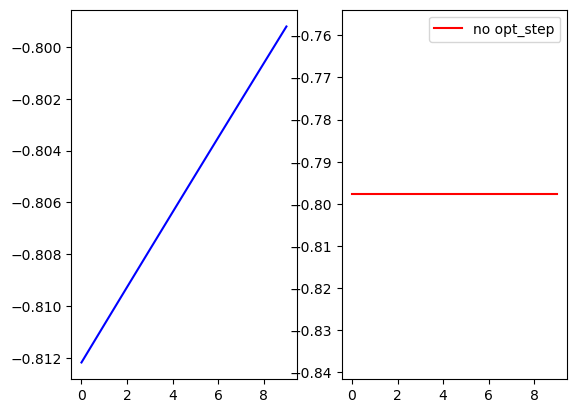

In [191]:
# b-value

plt.subplot(1,2,1)
plt.plot(range(len(b_list)), b_list, color='blue', label='opt_step')
plt.subplot(1,2,2)
plt.plot(range(len(b_list_no_opt_step)), b_list_no_opt_step, color='red', label='no opt_step')
plt.legend()
plt.show()

#### 최종결과

떄에 따라 값의 변화가 작다면, 모델이 계속 누적되어 학습되기 때문임으로 위의 모델 재정의 후에 다시 학습해야한다.

In [192]:
epochs = 100
loss_list = []

for epoch in range(epochs):
    optimizer.zero_grad()

    y_pred = model(X)

    loss = criterion(y_pred, y)
    loss_list.append(loss.item())
    loss.backward()
    
    optimizer.step()

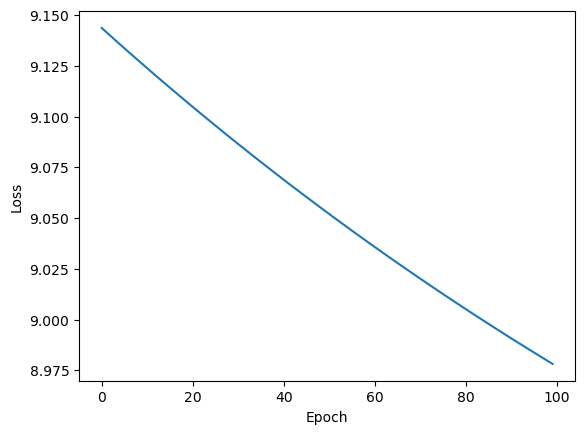

In [193]:
plt.plot(range(epochs), loss_list)
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

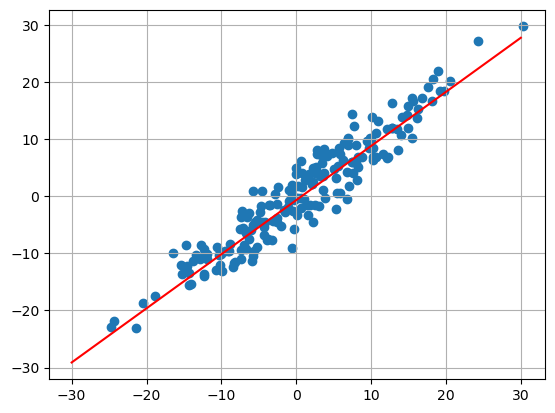

In [194]:
w1, b1 = w[0][0].item(), b[0].item() # 그냥 들어있는 초기값
x1 = np.array([-30,30])
y1 = w1 * x1 + b1

plt.plot(x1,y1, 'r')
plt.scatter(X,y)
plt.grid()
plt.show()

---
## Part2. ResNet50
- 아래부터는 이번 실습 세션에서 공부한 ResNet을 이용하는 문제입니다. 
- 실습 세션 자료를 참고하여 모델을 구현해보세요.

### 1. 실습 세션에서 사용한 라이브러리를 import 하세요.

In [195]:
## 라이브러리 임포트
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
import numpy as np
import time
from copy import deepcopy # Add Deepcopy for args
import matplotlib.pyplot as plt

### 2. 새로운 데이터셋을 불러오고, 실습세션에서처럼 데이터를 변형하세요.
- torchvision.dataset DOCS : https://pytorch.org/vision/main/datasets.html
- 기존 코드의 아래 부분을 변형하면 됩니다.
~~~
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [40000, 10000])
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)
~~~

In [198]:
# RandomCrop -> RandomHorizontalFlip -> ToTensor -> Normalize

transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465], std=[0.2023, 0.1994, 0.2010])
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [40000, 10000])
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=False, num_workers=4)


partition = {'train': train_dataset, 'val':val_dataset, 'test':test_dataset}

Files already downloaded and verified
Files already downloaded and verified


### 3. Bottleneck Block을 이용, ResNet50 모델을 완성하세요.

In [199]:
def conv3x3(in_planes, out_planes, stride=1):
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=1, bias=False) #stride 1, padding 1이면 차원 유지.


def conv1x1(in_planes, out_planes, stride=1):
    """1x1 convolution, 패딩 없음 """
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride,
                     bias=False)

class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(BasicBlock, self).__init__()
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = nn.BatchNorm2d(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = nn.BatchNorm2d(planes)
        self.downsample = downsample
        self.stride = stride


    # forward 함수 정의

    def forward(self, x):

        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        out = self.conv2(out) #stride = 1
        out = self.bn2(out)

        if self.downsample is not None:
            # out과 identity의 차원이 다를 경우
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out
    
class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, inplanes, planes, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = conv1x1(inplanes, planes)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = conv3x3(planes, planes, stride)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = conv1x1(planes, planes * self.expansion)
        self.bn3 = nn.BatchNorm2d(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x):
        # 이 부분 지우기
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
          identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out
    
class ResNet(nn.Module):

    def __init__(self, block, layers, num_classes=1000, zero_init_residual=False):
        super(ResNet, self).__init__() # 상속

        self.inplanes = 64

        # input [3 * 224 * 224 ]
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3,
                               bias=False) # 1/2배
        # ouput = self.conv1(input) [ 64 * 112 * 112 ]


        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1) # 1/2 배
        # output [64 * 56 * 56]

        ## layer정의
        #resnet18의 경우 (2,2,2,2)
        self.layer1 = self._make_layer(block, 64, layers[0] )
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2 )
        self.layer3 = self._make_layer(block, 256, layers[2],  stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        ## 가중치 초기화
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)


        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)


    # self.inplanes = 64

    #self.layer1 = self._make_layer(BasicBlock, 64, 2)
    def _make_layer(self, block, planes, blocks, stride=1):
        downsample = None
        if stride != 1 or self.inplanes != planes * block.expansion: # 64 = 64 * 1
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                nn.BatchNorm2d(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)

        return x




### 4. 불러온 데이터와 완성한 모델을 이용하여 모델 학습을 진행하세요.

In [200]:
def train(net, partition, optimizer, criterion, args):
    trainloader = torch.utils.data.DataLoader(partition['train'],
                                              batch_size=args.train_batch_size,
                                              shuffle=True, num_workers=2)
    net.train()

    correct = 0
    total = 0
    train_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        optimizer.zero_grad()

        # get the inputs
        inputs, labels = data
        inputs = inputs.cuda()
        labels = labels.cuda()
        outputs = net(inputs)

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    train_loss = train_loss / len(trainloader)
    train_acc = 100 * correct / total
    return net, train_loss, train_acc


def validate(net, partition, criterion, args):
    valloader = torch.utils.data.DataLoader(partition['val'],
                                            batch_size=args.test_batch_size,
                                            shuffle=False, num_workers=2)
    net.eval()

    correct = 0
    total = 0
    val_loss = 0
    with torch.no_grad():
        for data in valloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()
            outputs = net(images)

            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        val_loss = val_loss / len(valloader)
        val_acc = 100 * correct / total
    return val_loss, val_acc

def test(net, partition, args):
    testloader = torch.utils.data.DataLoader(partition['test'],
                                             batch_size=args.test_batch_size,
                                             shuffle=False, num_workers=2)
    net.eval()

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.cuda()
            labels = labels.cuda()

            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        test_acc = 100 * correct / total
    return test_acc


def experiment(partition, args):

    # resnet50 bottleneck block, [3, 4, 6, 3]
    net = ResNet(block=args.block, layers = args.layers, num_classes = 10,
                 zero_init_residual = args.zero_init_residual)
    net.cuda()

    criterion = nn.CrossEntropyLoss()
    if args.optim == 'SGD':
        optimizer = optim.SGD(net.parameters(), lr=args.lr, weight_decay=args.l2, momentum = 0.9)
    elif args.optim == 'RMSprop':
        optimizer = optim.RMSprop(net.parameters(), lr=args.lr, weight_decay=args.l2)
    elif args.optim == 'Adam':
        optimizer = optim.Adam(net.parameters(), lr=args.lr, weight_decay=args.l2)
    else:
        raise ValueError('In-valid optimizer choice')

    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    for epoch in range(args.epoch):  # loop over the dataset multiple times
        ts = time.time()
        net, train_loss, train_acc = train(net, partition, optimizer, criterion, args)
        val_loss, val_acc = validate(net, partition, criterion, args)
        te = time.time()

        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc)
        val_accs.append(val_acc)

        print('Epoch {}, Acc(train/val): {:2.2f}/{:2.2f}, Loss(train/val) {:2.2f}/{:2.2f}. Took {:2.2f} sec'.format(epoch, train_acc, val_acc, train_loss, val_loss, te-ts))

    test_acc = test(net, partition, args)

    result = {}
    result['train_losses'] = train_losses
    result['val_losses'] = val_losses
    result['train_accs'] = train_accs
    result['val_accs'] = val_accs
    result['train_acc'] = train_acc
    result['val_acc'] = val_acc
    result['test_acc'] = test_acc

import argparse
parser = argparse.ArgumentParser()
args = parser.parse_args("")

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# resnet18
seed = 1234
np.random.seed(seed)
torch.manual_seed(seed)

args.block = BasicBlock
args.layers = (2,2,2,2) #resnet18
args.zero_init_residual = False

args.optim = 'SGD'
args.lr = 0.0015
args.l2 = 0.0001

args.epoch = 50

args.train_batch_size = 254
args.test_batch_size = 1024

result = experiment(partition, args)

cuda
Epoch 0, Acc(train/val): 29.91/37.75, Loss(train/val) 1.91/1.69. Took 22.96 sec
Epoch 1, Acc(train/val): 41.30/43.64, Loss(train/val) 1.59/1.53. Took 20.45 sec
Epoch 2, Acc(train/val): 45.68/46.40, Loss(train/val) 1.48/1.46. Took 20.57 sec


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:154                                                                                  │
│                                                                                                  │
│   151 args.train_batch_size = 254                                                                │
│   152 args.test_batch_size = 1024                                                                │
│   153                                                                                            │
│ ❱ 154 result = experiment(partition, args)                                                       │
│   155                                                                                            │
│                                                                                                  │
│ in experiment:107                                                                                │
│                                                                                                  │
│   104 │                                                                                          │
│   105 │   for epoch in range(args.epoch):  # loop over the dataset multiple times                │
│   106 │   │   ts = time.time()                                                                   │
│ ❱ 107 │   │   net, train_loss, train_acc = train(net, partition, optimizer, criterion, args)     │
│   108 │   │   val_loss, val_acc = validate(net, partition, criterion, args)                      │
│   109 │   │   te = time.time()                                                                   │
│   110                                                                                            │
│                                                                                                  │
│ in train:10                                                                                      │
│                                                                                                  │
│     7 │   correct = 0                                                                            │
│     8 │   total = 0                                                                              │
│     9 │   train_loss = 0.0                                                                       │
│ ❱  10 │   for i, data in enumerate(trainloader, 0):                                              │
│    11 │   │   optimizer.zero_grad()                                                              │
│    12 │   │                                                                                      │
│    13 │   │   # get the inputs                                                                   │
│                                                                                                  │
│ c:\Users\user\anaconda3\lib\site-packages\torch\utils\data\dataloader.py:438 in __iter__         │
│                                                                                                  │
│    435 │   │   │   │   self._iterator._reset(self)                                               │
│    436 │   │   │   return self._iterator                                                         │
│    437 │   │   else:                                                                             │
│ ❱  438 │   │   │   return self._get_iterator()                                                   │
│    439 │                                                                                         │
│    440 │   @property                                                                             │
│    441 │   def _auto_collation(self):                                                            │
│                                                                                                  │
│ c:\Users\user\anaconda3\lib\site-packages\torch\utils\data\